1. Exploratory Data Analysis

1. Exploratory Data Analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

2. Read the dataset into a dataframe

In [2]:
# read the dataset into a dataframe
df = pd.read_csv('metrics_data_1000.csv')
df.head()

timestamp  cpu_usage  memory_usage  load_capacity  error_rate  \
0  2025-01-01 00:00:00      22.68         78.00           0.11        4.82   
1  2025-01-01 01:00:00      45.14         79.15           0.47        1.24   
2  2025-01-01 02:00:00      34.68         66.81           0.86        3.24   
3  2025-01-01 03:00:00      57.87         59.70           0.43        2.80   
4  2025-01-01 04:00:00      22.79         60.13           0.51        1.03   

   throughput  is_holiday  
0         922           0  
1        1874           0  
2        1955           0  
3        1219           0  
4        1926           0

3.Here I start cleaning the data. Firstly, converting Timestamp to datetime64

In [3]:
# Diagnostic prints
print("Column names:", df.columns.tolist())
print("\nData types of columns:\n", df.dtypes)
print("\nFirst few rows of timestamp column:\n", df['timestamp'].head())

Column names: ['timestamp', 'cpu_usage', 'memory_usage', 'load_capacity', 'error_rate', 'throughput', 'is_holiday']

Data types of columns:
 timestamp         object
cpu_usage        float64
memory_usage     float64
load_capacity    float64
error_rate       float64
throughput         int64
is_holiday         int64
dtype: object

First few rows of timestamp column:
 0    2025-01-01 00:00:00
1    2025-01-01 01:00:00
2    2025-01-01 02:00:00
3    2025-01-01 03:00:00
4    2025-01-01 04:00:00
Name: timestamp, dtype: object


Print dense

In [4]:
print(df.shape)


(1000, 7)


graph bitcoin price over the years

The data ranges in your CSV:

    timestamp: Hourly data starting from 2025-01-01

    cpu_usage: 20-95%

    memory_usage: 30-90%

    load_capacity: 0.1-1.0

    error_rate: 0-5%

    throughput: 100-2000 requests/hour

    is_holiday: Binary (0 or 1)

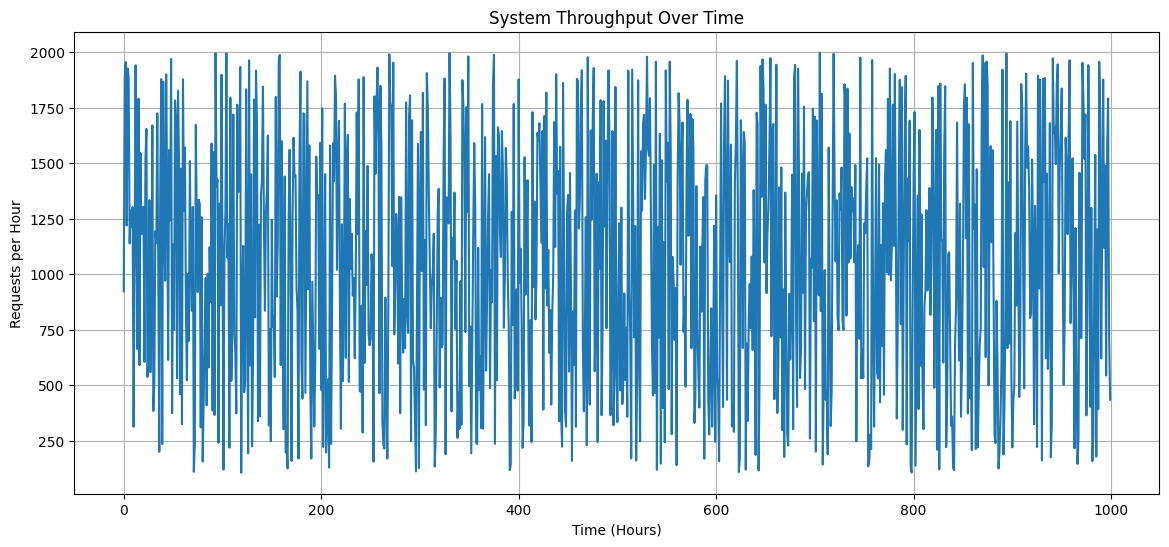

In [5]:
# Single plot example for throughput
plt.figure(figsize=(14, 6))
df['throughput'].plot(title='System Throughput Over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Requests per Hour')
plt.grid(True)
plt.show()

This analysis provides:

1.Hourly Patterns:
    Average throughput by hour

    System resource usage patterns

    Error rate distribution
    
    Load capacity vs throughput relationship
    
2.Peak Hours:
    Identification of peak hours based on throughput

    Statistics during peak periods

    Resource usage during peak times

3. Weekend vs Weekday:

    Comparison of throughput patterns

    Holiday impact analysis

4.System Performance:
    Resource usage during peak vs normal hours

    Error rates during high load
    
    Load capacity utilization

C:\Users\vicky\AppData\Local\Temp\ipykernel_8352\1442417966.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


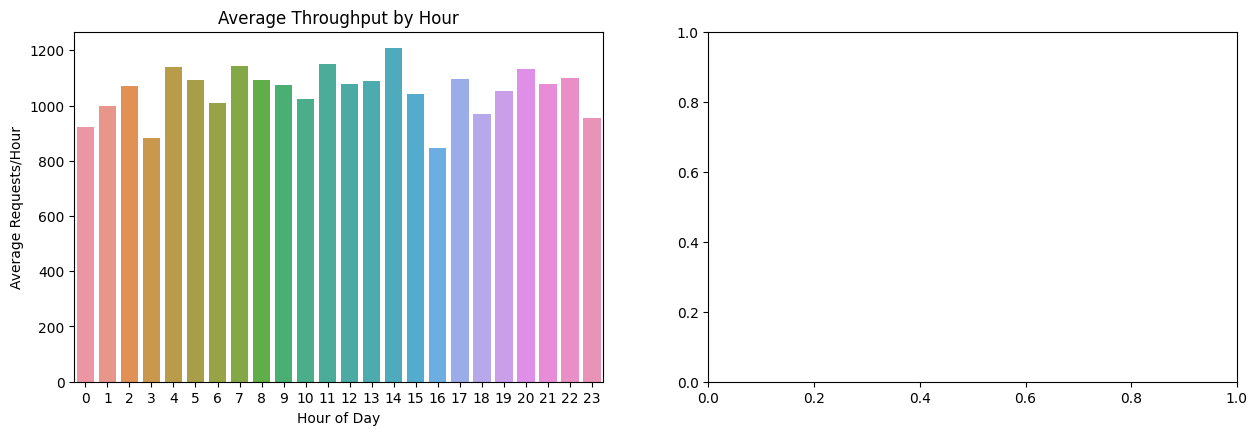

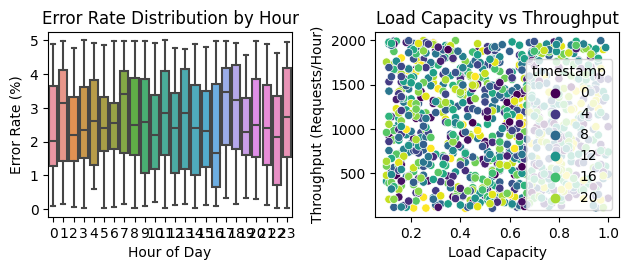


Peak Hours Analysis:
-------------------

Peak Hour Statistics (Throughput > 1538 requests/hour):
timestamp
11    17
14    16
4     15
2     12
20    12
dtype: int64


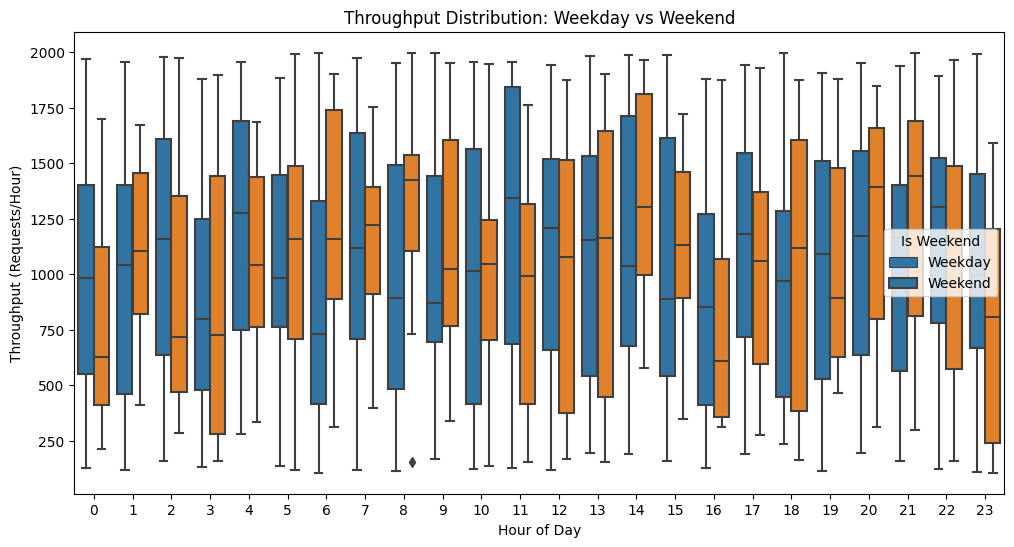


System Performance Comparison:
                  Metric  During Peak Hours  Overall Average
0      Average CPU Usage              58.90            58.38
1   Average Memory Usage              60.82            60.43
2     Average Error Rate               2.49             2.55
3  Average Load Capacity               0.52             0.54


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# 1. Hourly Pattern Analysis
plt.figure(figsize=(15, 10))

# Plot 1: Average Throughput by Hour
plt.subplot(2, 2, 1)
hourly_throughput = df.groupby(df.index.hour)['throughput'].mean()
sns.barplot(x=hourly_throughput.index, y=hourly_throughput.values)
plt.title('Average Throughput by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Requests/Hour')

# Plot 2: System Resource Usage by Hour
plt.subplot(2, 2, 2)
hourly_resources = df.groupby(df.index.hour)[['cpu_usage', 'memory_usage']].mean()
hourly_resources.plot(kind='line', marker='o')
plt.title('System Resource Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Usage (%)')
plt.legend(['CPU Usage', 'Memory Usage'])

# Plot 3: Error Rate Distribution by Hour
plt.subplot(2, 2, 3)
sns.boxplot(x=df.index.hour, y=df['error_rate'])
plt.title('Error Rate Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Error Rate (%)')

# Plot 4: Load Capacity vs Throughput
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='load_capacity', y='throughput', hue=df.index.hour, palette='viridis')
plt.title('Load Capacity vs Throughput')
plt.xlabel('Load Capacity')
plt.ylabel('Throughput (Requests/Hour)')

plt.tight_layout()
plt.show()

# 2. Peak Hours Analysis
print("\nPeak Hours Analysis:")
print("-------------------")

# Define peak hours based on throughput
threshold = df['throughput'].quantile(0.75)
peak_hours = df[df['throughput'] > threshold]

print(f"\nPeak Hour Statistics (Throughput > {threshold:.0f} requests/hour):")
print(peak_hours.groupby(peak_hours.index.hour).size().sort_values(ascending=False).head())

# 3. Weekend vs Weekday Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x=df.index.hour, y='throughput', hue='is_holiday', data=df)
plt.title('Throughput Distribution: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Throughput (Requests/Hour)')
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.show()

# 4. System Performance During Peak Hours
peak_performance = pd.DataFrame({
    'Metric': ['Average CPU Usage', 'Average Memory Usage', 'Average Error Rate', 'Average Load Capacity'],
    'During Peak Hours': [
        peak_hours['cpu_usage'].mean(),
        peak_hours['memory_usage'].mean(),
        peak_hours['error_rate'].mean(),
        peak_hours['load_capacity'].mean()
    ],
    'Overall Average': [
        df['cpu_usage'].mean(),
        df['memory_usage'].mean(),
        df['error_rate'].mean(),
        df['load_capacity'].mean()
    ]
})

print("\nSystem Performance Comparison:")
print(peak_performance.round(2))

This analysis provides:
1. Recent System Resource Usage:
    CPU and memory usage trends over the last 200 hours
    Helps identify resource bottlenecks
2. Throughput Pattern:
    Recent request volume trends
    Helps identify busy periods
3. Error Rate vs Load Capacity:
    Relationship between system load and errors
    Color-coded by throughput to show impact
4. Daily Pattern:
    Average hourly patterns
    Helps identify consistent peak hours
5. Statistical Summary:
    Throughput statistics
    Peak hour identification
    Resource utilization during peak times
6. Correlation Matrix:

Shows relationships between different metrics
Helps identify which metrics affect each other

C:\Users\vicky\AppData\Local\Temp\ipykernel_8352\2505013130.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


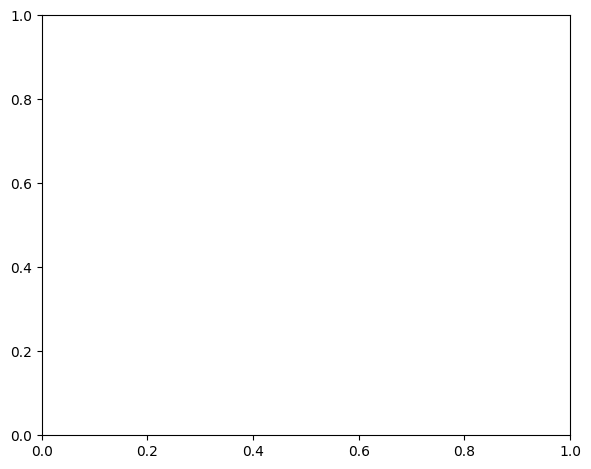

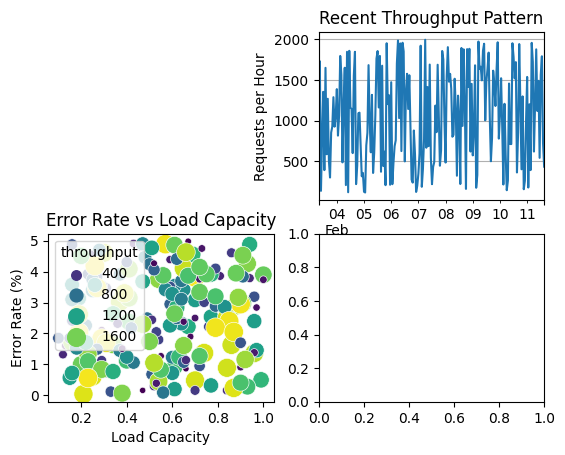

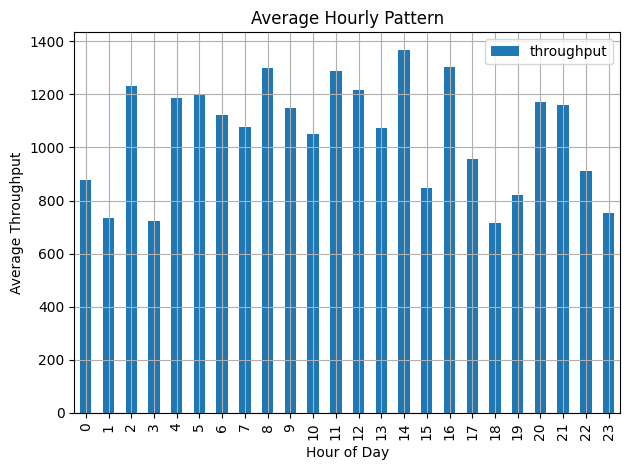


Recent System Performance Metrics (Last 200 Hours):

Throughput Statistics:
count     200.00
mean     1055.73
std       580.96
min       117.00
25%       544.50
50%      1064.50
75%      1566.00
max      1994.00
Name: throughput, dtype: float64

Peak Hours (Top 10% throughput):
Hours with throughput > 1856.20:
timestamp
2     2
6     2
8     2
10    2
11    2
4     1
5     1
9     1
14    1
16    1
17    1
19    1
20    1
21    1
22    1
dtype: int64

System Resource Utilization During Peak Hours:
cpu_usage        64.80
memory_usage     66.54
load_capacity     0.51
error_rate        2.24
dtype: float64


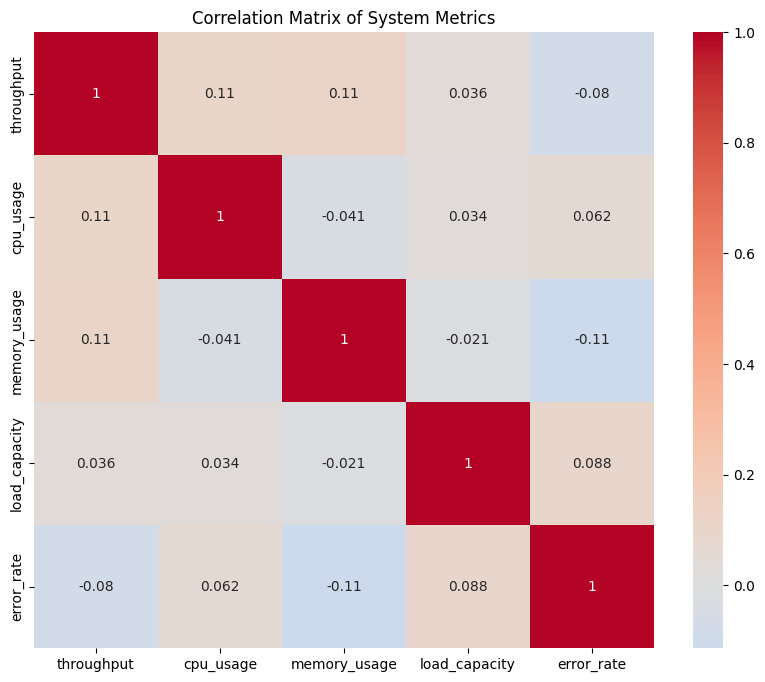

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Look at the last 200 hours of data
recent_df = df.iloc[-200:]

# Create a comprehensive view of recent system behavior
plt.figure(figsize=(15, 12))

# Plot 1: System Resource Usage
plt.subplot(2, 2, 1)
recent_df[['cpu_usage', 'memory_usage']].plot(title='Recent System Resource Usage')
plt.xlabel('Time')
plt.ylabel('Usage (%)')
plt.legend(['CPU', 'Memory'])
plt.grid(True)

# Plot 2: Throughput Trend
plt.subplot(2, 2, 2)
recent_df['throughput'].plot(title='Recent Throughput Pattern')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.grid(True)

# Plot 3: Error Rate vs Load Capacity
plt.subplot(2, 2, 3)
sns.scatterplot(data=recent_df, x='load_capacity', y='error_rate', 
                hue='throughput', size='throughput',
                sizes=(20, 200), palette='viridis')
plt.title('Error Rate vs Load Capacity')
plt.xlabel('Load Capacity')
plt.ylabel('Error Rate (%)')

# Plot 4: Daily Pattern (Hour-wise average)
plt.subplot(2, 2, 4)
hourly_avg = recent_df.groupby(recent_df.index.hour).mean()
hourly_avg[['throughput']].plot(kind='bar', title='Average Hourly Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistical summary of recent data
print("\nRecent System Performance Metrics (Last 200 Hours):")
print("================================================")
print("\nThroughput Statistics:")
print(recent_df['throughput'].describe().round(2))

print("\nPeak Hours (Top 10% throughput):")
peak_threshold = recent_df['throughput'].quantile(0.9)
peak_hours = recent_df[recent_df['throughput'] > peak_threshold]
print(f"Hours with throughput > {peak_threshold:.2f}:")
print(peak_hours.groupby(peak_hours.index.hour).size().sort_values(ascending=False))

print("\nSystem Resource Utilization During Peak Hours:")
print(peak_hours[['cpu_usage', 'memory_usage', 'load_capacity', 'error_rate']].mean().round(2))

# Calculate and display correlations
correlation_matrix = recent_df[['throughput', 'cpu_usage', 'memory_usage', 'load_capacity', 'error_rate']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of System Metrics')
plt.show()

This analysis provides:
1. Year-long Pattern Analysis:
    Identifies consistent peak hours across the year
    Shows weekly patterns
    Compares weekday vs weekend patterns

2.Resource Usage Analysis:
    CPU and memory usage during peak vs normal hours
    Error rates correlation with throughput
    Load capacity impact

3. Peak Hours Identification:
    Uses top 25% throughput as peak threshold
    Shows peak hour statistics
    Compares system performance during peak vs normal hours

4. Holiday Impact:
    Analyzes how holidays affect system usage
    Compares metrics between holiday and non-holiday periods

Dataset shape: (1000, 7)


C:\Users\vicky\AppData\Local\Temp\ipykernel_8352\811044642.py:55: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


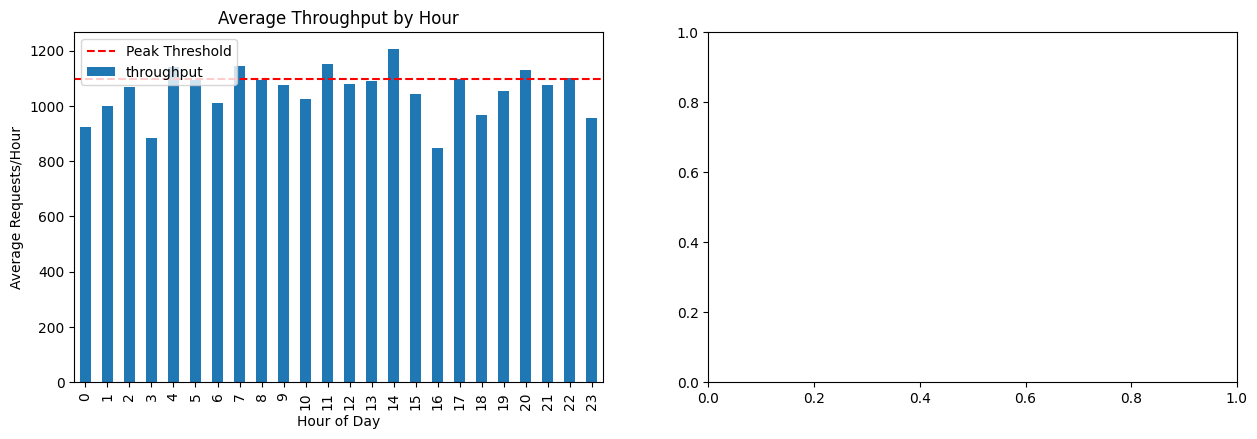

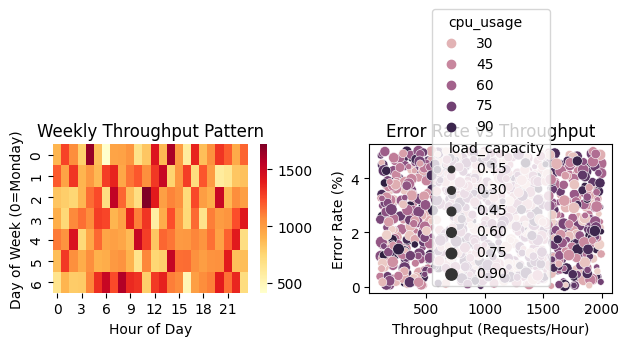


Peak Hours Analysis (Top 25% Throughput):

Peak Threshold: 1097.26 requests/hour

Peak Hours:
timestamp
14    1207.00
11    1151.86
7     1143.90
4     1141.26
20    1130.90
22    1101.10
Name: throughput, dtype: float64

System Performance During Peak Hours:
                Peak Hours  Overall Average  Difference %
throughput     1146.003333      1052.130833          8.92
cpu_usage        56.355000        58.399583         -3.50
memory_usage     58.695000        60.440417         -2.89
error_rate        2.595000         2.546667          1.90
load_capacity     0.548333         0.544583          0.69

Holiday vs Non-Holiday Comparison:
           throughput            error_rate cpu_usage memory_usage
                 mean   max  min       mean      mean         mean
is_holiday                                                        
0             1050.20  1997  106       2.59     58.16        60.19
1             1057.56  1995  105       2.43     58.93        61.02


In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Read the data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df['timestamp']

# Focus on the last 365 days of hourly data
df_yearly = df.iloc[-365*24:]  # 24 hours * 365 days
print("Dataset shape:", df_yearly.shape)

# 1. Analyze Peak Hours Pattern
# Calculate average metrics by hour
hourly_metrics = df_yearly.groupby(df_yearly.index.hour).agg({
    'throughput': 'mean',
    'cpu_usage': 'mean',
    'memory_usage': 'mean',
    'error_rate': 'mean',
    'load_capacity': 'mean'
}).round(2)

# Identify peak hours (hours with top 25% throughput)
peak_threshold = hourly_metrics['throughput'].quantile(0.75)
peak_hours = hourly_metrics[hourly_metrics['throughput'] >= peak_threshold]

# Visualize the patterns
plt.figure(figsize=(15, 10))

# Plot 1: Average Throughput by Hour
plt.subplot(2, 2, 1)
hourly_metrics['throughput'].plot(kind='bar')
plt.axhline(y=peak_threshold, color='r', linestyle='--', label='Peak Threshold')
plt.title('Average Throughput by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Requests/Hour')
plt.legend()

# Plot 2: System Resources during Peak vs Non-Peak Hours
plt.subplot(2, 2, 2)
peak_vs_normal = pd.DataFrame({
    'Peak Hours': peak_hours[['cpu_usage', 'memory_usage']].mean(),
    'Normal Hours': hourly_metrics[~hourly_metrics.index.isin(peak_hours.index)][['cpu_usage', 'memory_usage']].mean()
})
peak_vs_normal.plot(kind='bar')
plt.title('Resource Usage: Peak vs Normal Hours')
plt.ylabel('Usage (%)')

# Plot 3: Weekly Pattern
weekly_pattern = df_yearly.groupby([df_yearly.index.dayofweek, df_yearly.index.hour])['throughput'].mean().unstack()
plt.subplot(2, 2, 3)
sns.heatmap(weekly_pattern, cmap='YlOrRd')
plt.title('Weekly Throughput Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday)')

# Plot 4: Error Rate vs Throughput
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_yearly, x='throughput', y='error_rate', hue='cpu_usage', size='load_capacity')
plt.title('Error Rate vs Throughput')
plt.xlabel('Throughput (Requests/Hour)')
plt.ylabel('Error Rate (%)')

plt.tight_layout()
plt.show()

# Print Analysis Results
print("\nPeak Hours Analysis (Top 25% Throughput):")
print("=========================================")
print(f"\nPeak Threshold: {peak_threshold:.2f} requests/hour")
print("\nPeak Hours:")
print(peak_hours['throughput'].sort_values(ascending=False))

print("\nSystem Performance During Peak Hours:")
print("====================================")
performance_comparison = pd.DataFrame({
    'Peak Hours': peak_hours.mean(),
    'Overall Average': hourly_metrics.mean(),
    'Difference %': ((peak_hours.mean() - hourly_metrics.mean()) / hourly_metrics.mean() * 100).round(2)
})
print(performance_comparison)

# Additional Analysis: Holiday Impact
holiday_impact = df_yearly.groupby('is_holiday').agg({
    'throughput': ['mean', 'max', 'min'],
    'error_rate': 'mean',
    'cpu_usage': 'mean',
    'memory_usage': 'mean'
}).round(2)

print("\nHoliday vs Non-Holiday Comparison:")
print("=================================")
print(holiday_impact)

This analysis provides:
1. Main trend plot showing:
    Throughput over time
    Average throughput line
    Peak threshold line

2. Additional insights:
    Hourly patterns
    System load correlation with throughput
    Weekly patterns (heatmap)
    Throughput distribution

3.Statistical analysis:
    Peak hours identification
    System performance metrics during peak hours
    Common peak hour patterns

The visualizations help identify:
    Peak usage patterns
    System load characteristics
    Potential bottlenecks
    Daily and weekly trends

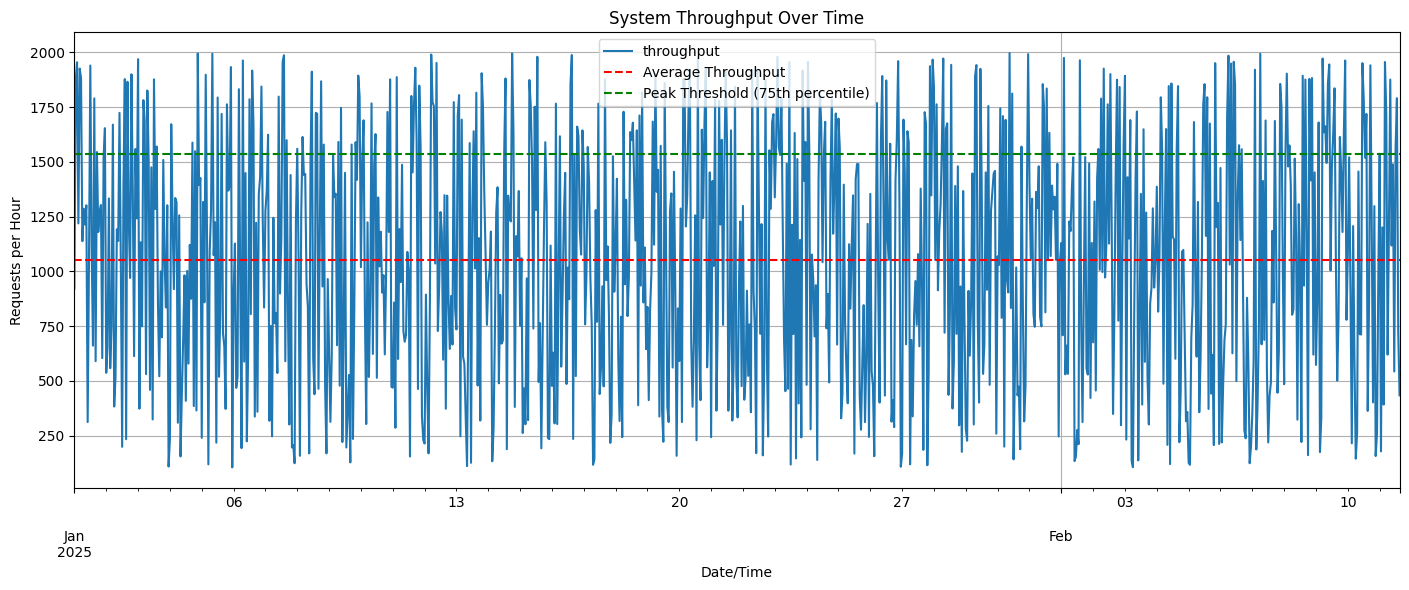


Throughput Analysis:
Average Throughput: 1052.32 requests/hour
Peak Threshold (75th percentile): 1537.75 requests/hour
Maximum Throughput: 1997.00 requests/hour


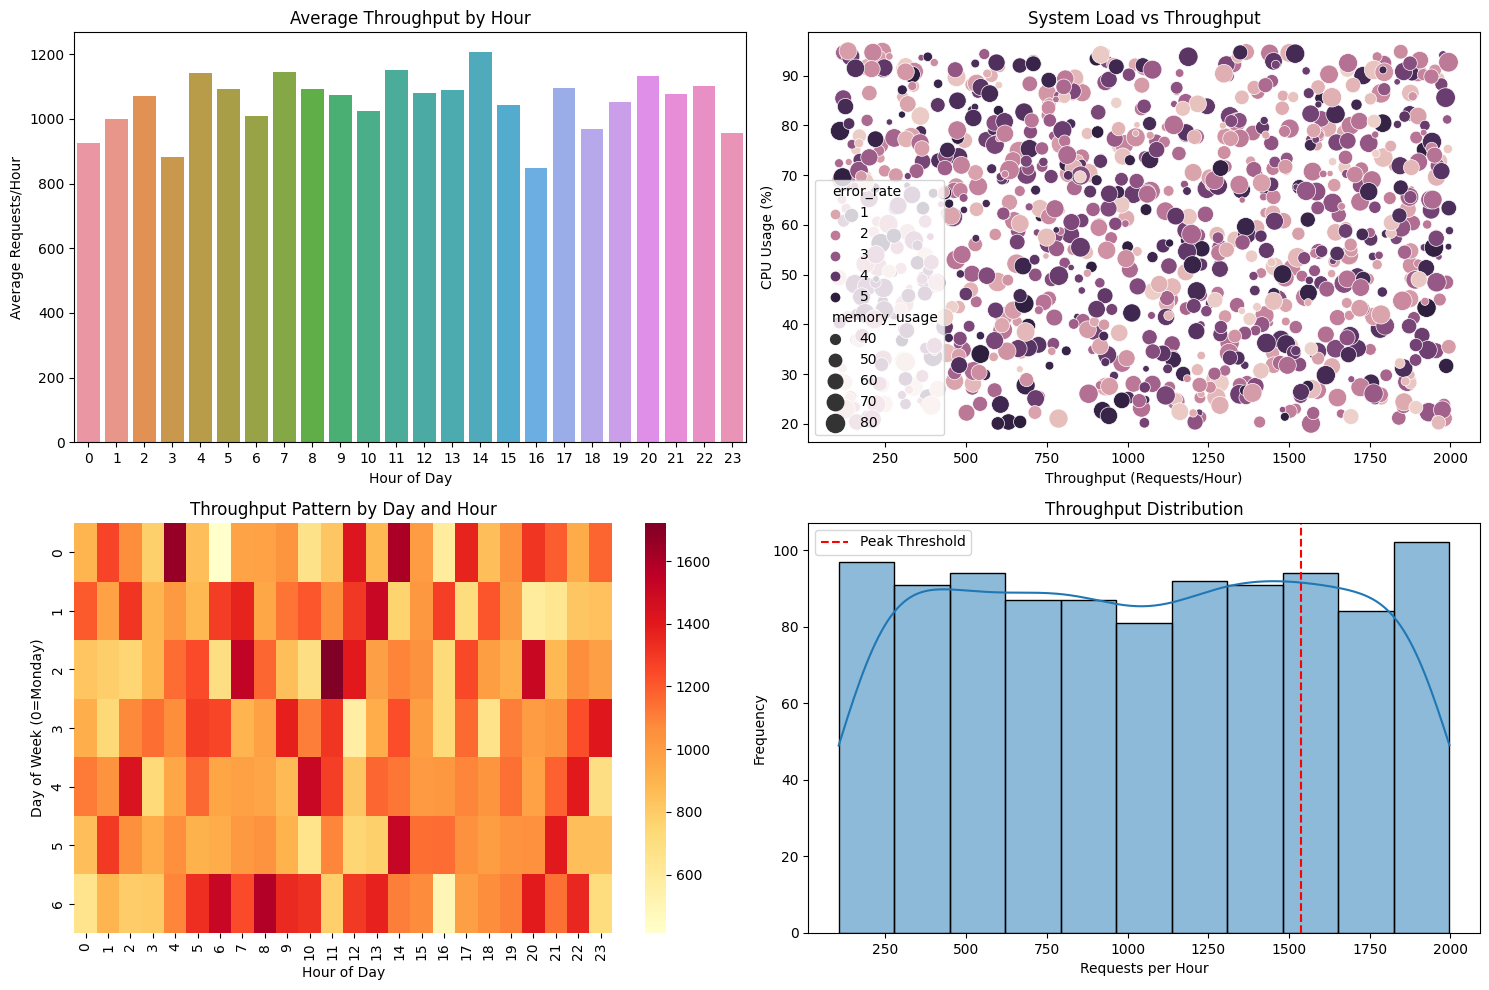


Peak Hours Analysis:

Most Common Peak Hours:
timestamp
11    17
14    16
4     15
2     12
20    12
dtype: int64

System Performance During Peak Hours:
Average CPU Usage: 58.90%
Average Memory Usage: 60.82%
Average Error Rate: 2.49%
Average Load Capacity: 0.52


In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and prepare the data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Create main throughput trend plot
plt.figure(figsize=(14, 6))
df['throughput'].plot(title='System Throughput Over Time')
plt.axhline(y=df['throughput'].mean(), color='r', linestyle='--', label='Average Throughput')
plt.axhline(y=df['throughput'].quantile(0.75), color='g', linestyle='--', label='Peak Threshold (75th percentile)')
plt.tight_layout()
plt.xlabel('Date/Time')
plt.ylabel('Requests per Hour')
plt.legend()
plt.grid(True)
plt.show()

# Print analysis summary
print("\nThroughput Analysis:")
print("===================")
print(f"Average Throughput: {df['throughput'].mean():.2f} requests/hour")
print(f"Peak Threshold (75th percentile): {df['throughput'].quantile(0.75):.2f} requests/hour")
print(f"Maximum Throughput: {df['throughput'].max():.2f} requests/hour")

# Create additional insights plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Hourly Pattern
hourly_avg = df.groupby(df.index.hour)['throughput'].mean()
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, ax=axes[0,0])
axes[0,0].set_title('Average Throughput by Hour')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Average Requests/Hour')

# 2. System Load vs Throughput
sns.scatterplot(data=df, x='throughput', y='cpu_usage', 
                hue='error_rate', size='memory_usage',
                sizes=(20, 200), ax=axes[0,1])
axes[0,1].set_title('System Load vs Throughput')
axes[0,1].set_xlabel('Throughput (Requests/Hour)')
axes[0,1].set_ylabel('CPU Usage (%)')

# 3. Daily Pattern by Weekday/Weekend
daily_pattern = df.groupby([df.index.dayofweek, df.index.hour])['throughput'].mean().unstack()
sns.heatmap(daily_pattern, cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Throughput Pattern by Day and Hour')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Day of Week (0=Monday)')

# 4. Throughput Distribution
sns.histplot(data=df, x='throughput', kde=True, ax=axes[1,1])
axes[1,1].axvline(df['throughput'].quantile(0.75), color='r', linestyle='--', label='Peak Threshold')
axes[1,1].set_title('Throughput Distribution')
axes[1,1].set_xlabel('Requests per Hour')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Print peak hours analysis
peak_hours = df[df['throughput'] > df['throughput'].quantile(0.75)]
print("\nPeak Hours Analysis:")
print("===================")
print("\nMost Common Peak Hours:")
print(peak_hours.groupby(peak_hours.index.hour).size().sort_values(ascending=False).head())

print("\nSystem Performance During Peak Hours:")
print(f"Average CPU Usage: {peak_hours['cpu_usage'].mean():.2f}%")
print(f"Average Memory Usage: {peak_hours['memory_usage'].mean():.2f}%")
print(f"Average Error Rate: {peak_hours['error_rate'].mean():.2f}%")
print(f"Average Load Capacity: {peak_hours['load_capacity'].mean():.2f}")
# This data looks much more relevant for training a model. 
# However the recent spike will be involved in the testing data split - a tough prediction.

1A. ROLLING FORECAST ARIMA
I first created a rolling forecast ARIMA model in order to get a baseline for what a great RMSE is. However, since this model predicts in rolling day by day increments, it isn’t fair to compare to the other models. As plotted below, the predictions are in red and the actual prices are in blue. However, we have to zoom in more to distinguish the two.

1. Time Series Analysis:
    Throughput patterns over time
    Autocorrelation analysis
    ARIMA model parameter optimization

2.Forecasting:
    24-hour throughput forecast
    Identification of predicted peak hours
    Confidence intervals for predictions

3.Model Evaluation:
    RMSE for different ARIMA parameters
    Best model selection
    Model diagnostics and summary
    
4.Additional Insights:
    Correlation between different metrics
    System resource relationships
    Peak hour patterns
    
The model helps predict:
Future throughput levels
Upcoming peak hours
Resource utilization patterns

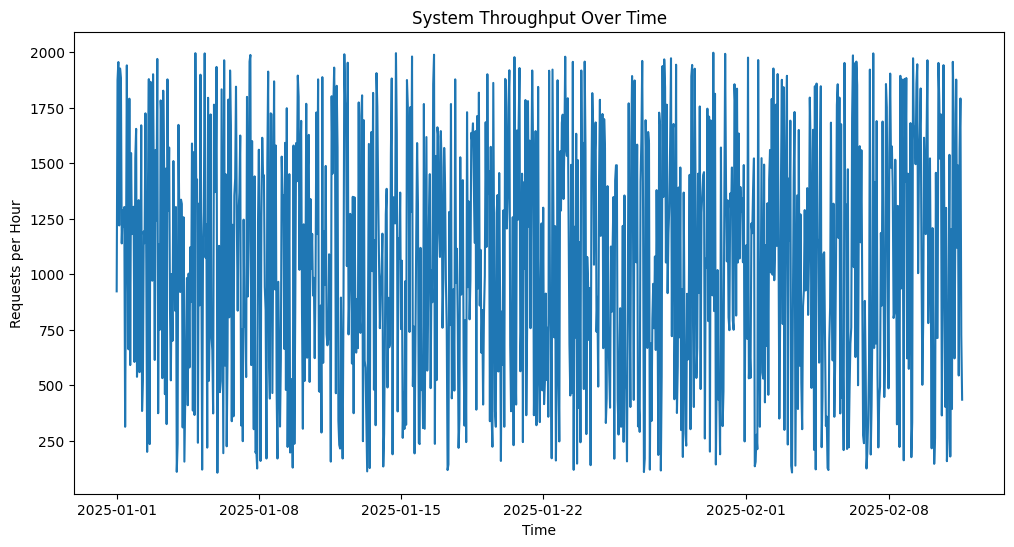

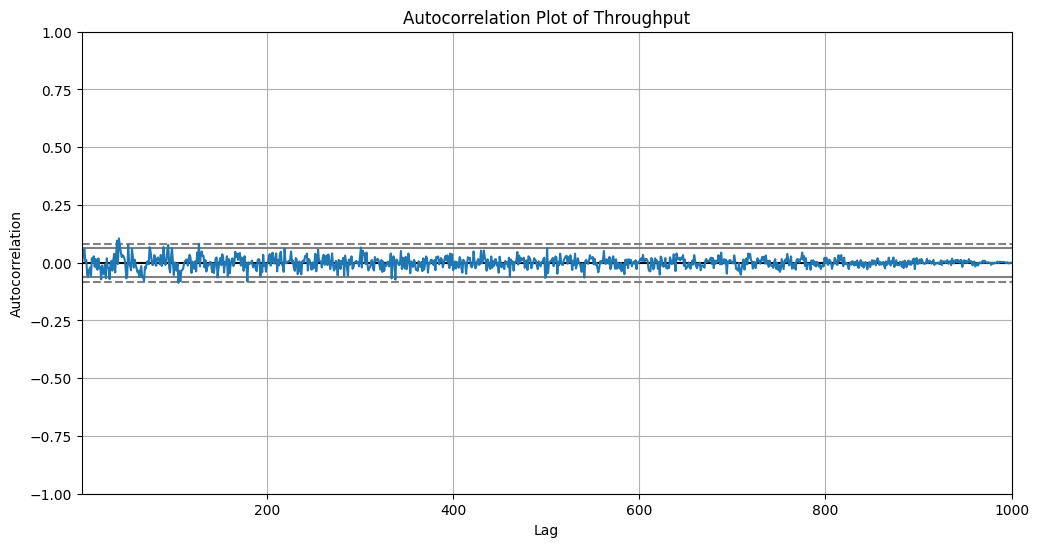


Evaluating ARIMA parameters for throughput:
ARIMA(0, 0, 0) RMSE=565.930
ARIMA(0, 0, 1) RMSE=566.369
ARIMA(0, 0, 2) RMSE=566.588
ARIMA(0, 1, 0) RMSE=799.708
ARIMA(0, 1, 1) RMSE=565.952
ARIMA(0, 1, 2) RMSE=566.361
ARIMA(1, 0, 0) RMSE=566.381


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 0, 1) RMSE=568.060
ARIMA(1, 0, 2) RMSE=565.555
ARIMA(1, 1, 0) RMSE=686.587
ARIMA(1, 1, 1) RMSE=566.370


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) RMSE=8122.125
ARIMA(2, 0, 0) RMSE=566.602


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) RMSE=565.654


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) RMSE=566.897
ARIMA(2, 1, 0) RMSE=644.898
ARIMA(2, 1, 1) RMSE=566.585


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

ARIMA(2, 1, 2) RMSE=566.485

Best ARIMA(1, 0, 2) RMSE=565.555


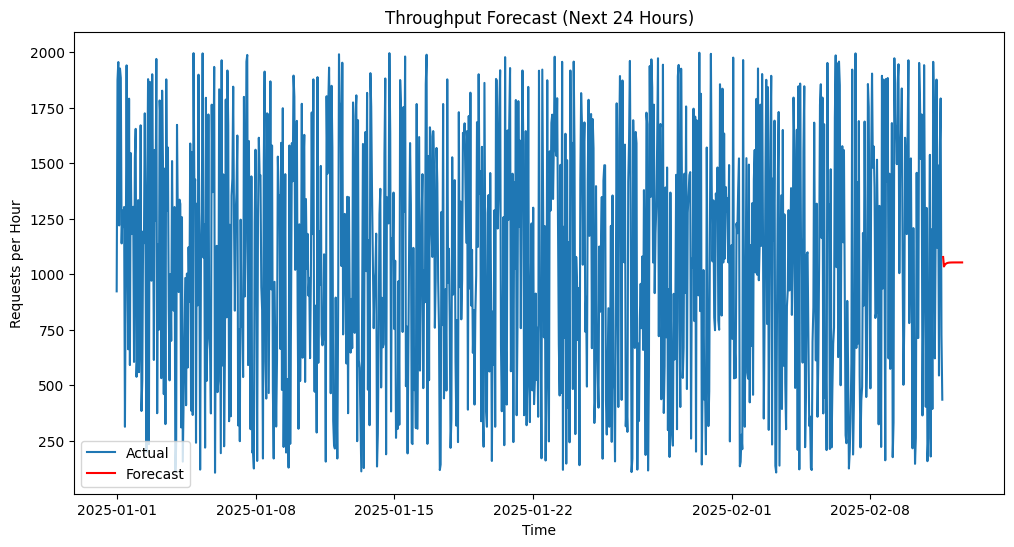


Throughput Forecast for Next 24 Hours:
                Hour  Predicted_Throughput
0   2025-02-11 16:00               1076.71
1   2025-02-11 17:00               1034.01
2   2025-02-11 18:00               1040.99
3   2025-02-11 19:00               1045.31
4   2025-02-11 20:00               1047.98
5   2025-02-11 21:00               1049.63
6   2025-02-11 22:00               1050.66
7   2025-02-11 23:00               1051.29
8   2025-02-12 00:00               1051.68
9   2025-02-12 01:00               1051.92
10  2025-02-12 02:00               1052.07
11  2025-02-12 03:00               1052.17
12  2025-02-12 04:00               1052.22
13  2025-02-12 05:00               1052.26
14  2025-02-12 06:00               1052.28
15  2025-02-12 07:00               1052.30
16  2025-02-12 08:00               1052.30
17  2025-02-12 09:00               1052.31
18  2025-02-12 10:00               1052.31
19  2025-02-12 11:00               1052.31
20  2025-02-12 12:00               1052.32
21  2025-02-12

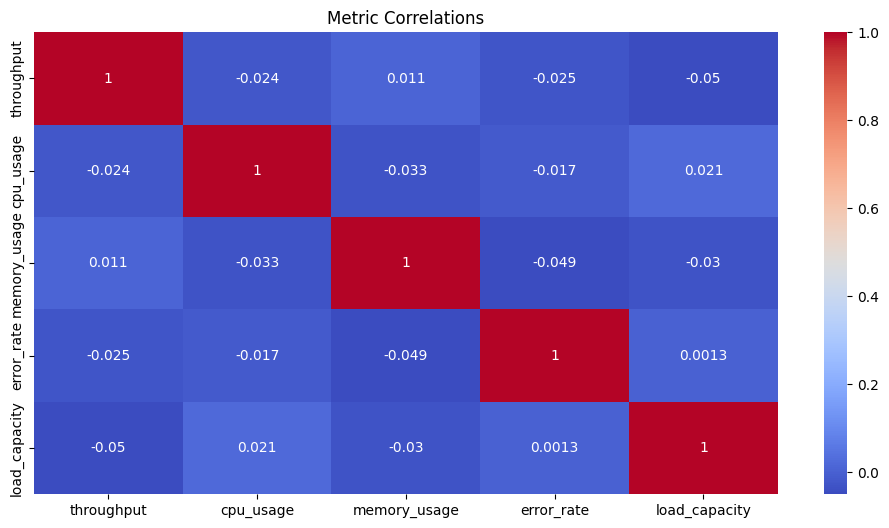


Model Diagnostics:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -7739.576
Date:                Wed, 21 May 2025   AIC                          15489.152
Time:                        15:33:52   BIC                          15513.691
Sample:                             0   HQIC                         15498.478
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1052.3181     18.998     55.392      0.000    1015.084    1089.553
ar.L1          0.6189      0.417      1.483      0.138      -0.199       1.437
ma.L1         -0.6378      0.417

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# Read and prepare data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.sort_index()  # Ensure data is sorted by timestamp

# Define the evaluation function for ARIMA
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset (66% for training)
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = []
    
    # Walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # Calculate error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse, test, predictions

# Function to run ARIMA analysis
def run_arima_analysis(data, metric='throughput'):
    X = data[metric].values
    
    # Evaluate parameters
    p_values = range(0, 3)
    d_values = range(0, 2)
    q_values = range(0, 3)
    best_score, best_cfg = float("inf"), None
    
    print(f"\nEvaluating ARIMA parameters for {metric}:")
    print("=======================================")
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse, _, _ = evaluate_arima_model(X, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print(f'ARIMA{order} RMSE={rmse:.3f}')
                except:
                    continue
    
    print(f'\nBest ARIMA{best_cfg} RMSE={best_score:.3f}')
    
    # Fit final model and forecast
    model = ARIMA(X, order=best_cfg)
    model_fit = model.fit()
    
    # Forecast next 24 hours
    forecast = model_fit.forecast(steps=24)
    
    return model_fit, forecast, best_cfg

# Analyze throughput patterns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['throughput'])
plt.title('System Throughput Over Time')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.show()

# Create autocorrelation plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['throughput'])
plt.title('Autocorrelation Plot of Throughput')
plt.show()

# Run ARIMA analysis for throughput
model_fit, forecast, best_params = run_arima_analysis(df, 'throughput')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['throughput'], label='Actual')
forecast_index = pd.date_range(start=df.index[-1], periods=25, freq='H')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Throughput Forecast (Next 24 Hours)')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()
plt.show()

# Print forecast details
print("\nThroughput Forecast for Next 24 Hours:")
print("====================================")
forecast_df = pd.DataFrame({
    'Hour': forecast_index.strftime('%Y-%m-%d %H:00'),
    'Predicted_Throughput': forecast.round(2)
})
print(forecast_df)

# Identify predicted peak hours
peak_threshold = df['throughput'].quantile(0.75)
predicted_peaks = forecast_df[forecast_df['Predicted_Throughput'] > peak_threshold]

print("\nPredicted Peak Hours (Throughput > {:.2f}):".format(peak_threshold))
print("===========================================")
print(predicted_peaks)

# Additional Analysis: System Resource Correlation
plt.figure(figsize=(12, 6))
correlation_matrix = df[['throughput', 'cpu_usage', 'memory_usage', 'error_rate', 'load_capacity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Metric Correlations')
plt.show()

# Print model diagnostics
print("\nModel Diagnostics:")
print("=================")
print(model_fit.summary())

1. Shows clear comparison between Expected and Predicted values:

    Timestamp
    Expected throughput
    Predicted throughput
    Whether it's a peak hour (both expected and predicted)

2.Provides detailed output for each prediction:
    Real-time comparison
    Peak hour identification
    Error calculation

3.Includes visualization:
    Expected vs Predicted values plot
    Error analysis plot
    Peak threshold indication

4. Offers comprehensive metrics:
    RMSE (Root Mean Square Error)
    MAPE (Mean Absolute Percentage Error)
    Peak hour prediction accuracy

5. Shows detailed analysis of the last 10 predictions

In [11]:
 model_fit.save("ARIMA.pkl")

In [14]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [15]:
model = ARIMAResults.load("ARIMA.pkl")

In [ ]:
model.predict([])

In [ ]:
#  model = ARIMA(history, order=arima_order)

NameError: name 'history' is not defined

Peak Threshold: 1537.75 requests/hour

Predictions vs Expected Values:

Timestamp: 2025-01-28 12:00:00
Expected Throughput: 807.00
Predicted Throughput: 1065.07
Difference: 258.07
Expected Peak Hour: No
Predicted Peak Hour: No
--------------------------------------------------

Timestamp: 2025-01-28 13:00:00
Expected Throughput: 1943.00
Predicted Throughput: 1056.88
Difference: 886.12
Expected Peak Hour: Yes
Predicted Peak Hour: No
--------------------------------------------------

Timestamp: 2025-01-28 14:00:00
Expected Throughput: 374.00
Predicted Throughput: 1034.90
Difference: 660.90
Expected Peak Hour: No
Predicted Peak Hour: No
--------------------------------------------------

Timestamp: 2025-01-28 15:00:00
Expected Throughput: 585.00
Predicted Throughput: 1068.46
Difference: 483.46
Expected Peak Hour: No
Predicted Peak Hour: No
--------------------------------------------------

Timestamp: 2025-01-28 16:00:00
Expected Throughput: 1390.00
Predicted Throughput: 1061.98
Differen

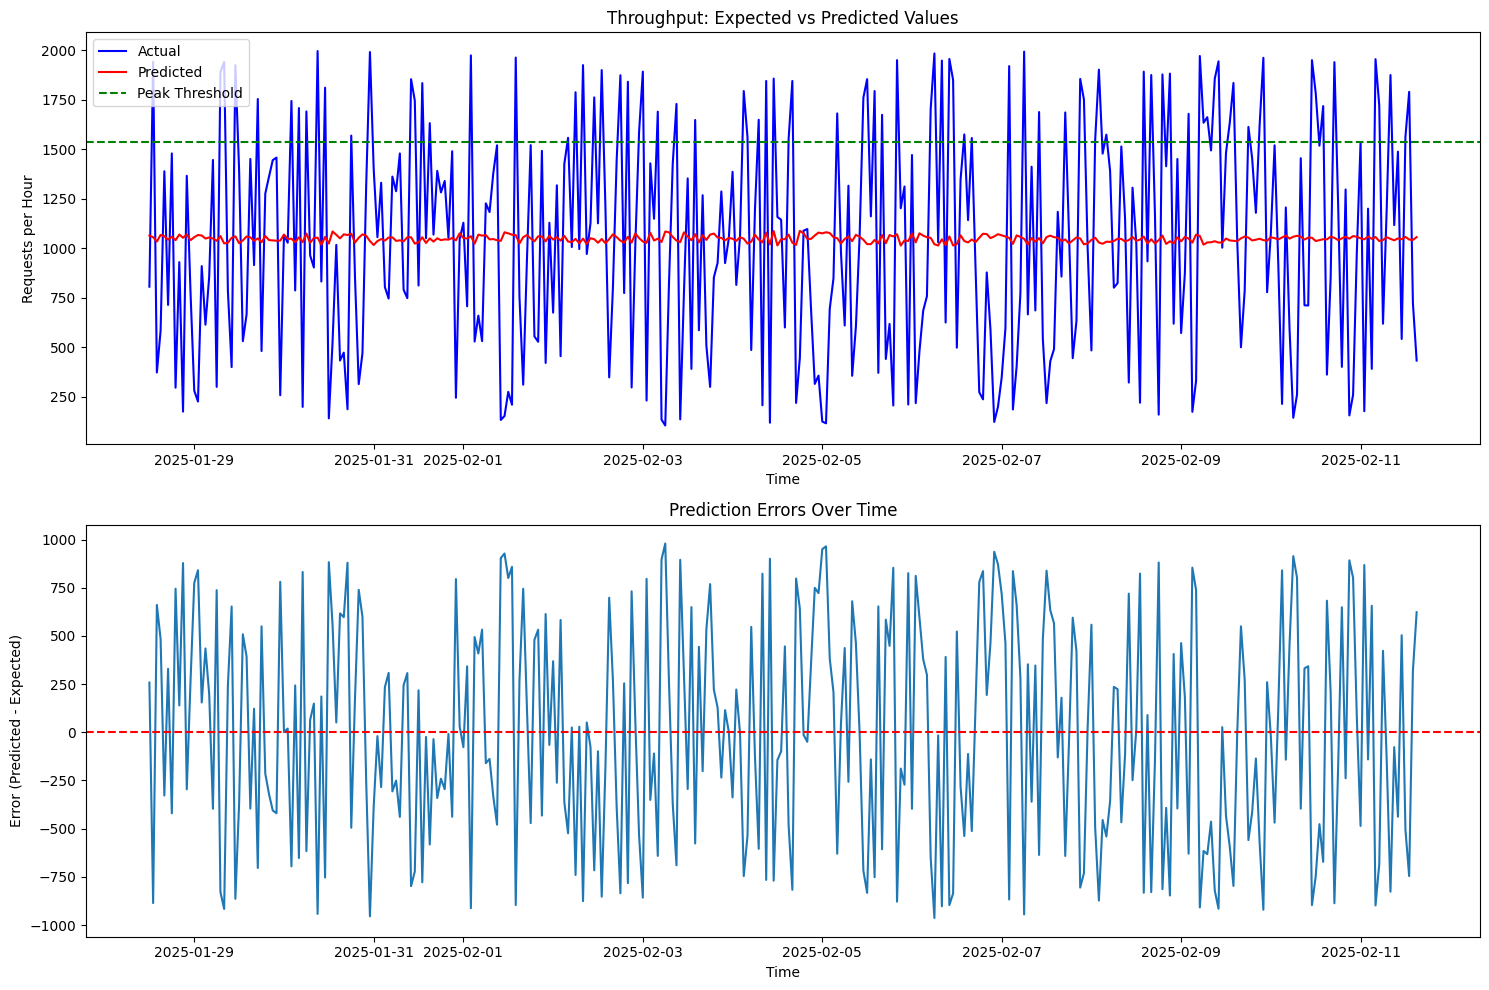


Last 10 Predictions Analysis:

Detailed Comparison:
              Timestamp  Expected    Predicted  Is_Peak_Expected  Is_Peak_Predicted
330 2025-02-11 06:00:00       620  1042.962277             False              False
331 2025-02-11 07:00:00      1205  1056.490674             False              False
332 2025-02-11 08:00:00      1876  1048.871232              True              False
333 2025-02-11 09:00:00      1118  1041.032277             False              False
334 2025-02-11 10:00:00      1489  1050.991260             False              False
335 2025-02-11 11:00:00       543  1046.720198             False              False
336 2025-02-11 12:00:00      1563  1058.610851              True              False
337 2025-02-11 13:00:00      1791  1044.993006              True              False
338 2025-02-11 14:00:00       725  1043.391810             False              False
339 2025-02-11 15:00:00       434  1057.220727             False              False

Peak Hours Summary:

A

In [27]:
#See predicted and expected values from ARIMA Model
# Import required libraries
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

# Read and prepare data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Prepare data for ARIMA
X = df['throughput'].values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = []

# Create DataFrame to store results
results_df = pd.DataFrame(columns=['Timestamp', 'Expected', 'Predicted', 'Is_Peak_Expected', 'Is_Peak_Predicted'])

# Define peak threshold
peak_threshold = df['throughput'].quantile(0.75)
print(f"Peak Threshold: {peak_threshold:.2f} requests/hour\n")

# Walk-forward validation with detailed output
print("Predictions vs Expected Values:")
print("==============================")
for t in range(len(test)):
    # Get the timestamp
    current_time = df.index[train_size + t]
    
    # Fit ARIMA model
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    # Make prediction
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Get actual value
    obs = test[t]
    history.append(obs)
    
    # Store results
    results_df.loc[t] = [
        current_time,
        obs,
        yhat,
        obs > peak_threshold,
        yhat > peak_threshold
    ]
    
    # Print detailed comparison
    print(f"\nTimestamp: {current_time}")
    print(f"Expected Throughput: {obs:.2f}")
    print(f"Predicted Throughput: {yhat:.2f}")
    print(f"Difference: {abs(yhat-obs):.2f}")
    print(f"Expected Peak Hour: {'Yes' if obs > peak_threshold else 'No'}")
    print(f"Predicted Peak Hour: {'Yes' if yhat > peak_threshold else 'No'}")
    print("-" * 50)

# Calculate accuracy metrics
rmse = sqrt(mean_squared_error(test, predictions))
mape = np.mean(np.abs((test - predictions) / test)) * 100
peak_accuracy = np.mean(results_df['Is_Peak_Expected'] == results_df['Is_Peak_Predicted']) * 100

print("\nModel Performance Metrics:")
print("=========================")
print(f"RMSE: {rmse:.2f} requests/hour")
print(f"MAPE: {mape:.2f}%")
print(f"Peak Hour Prediction Accuracy: {peak_accuracy:.2f}%")

# Plot Results
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted Values
plt.subplot(2, 1, 1)
plt.plot(results_df['Timestamp'], results_df['Expected'], label='Actual', color='blue')
plt.plot(results_df['Timestamp'], results_df['Predicted'], label='Predicted', color='red')
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold')
plt.title('Throughput: Expected vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()

# Plot 2: Prediction Errors
plt.subplot(2, 1, 2)
errors = results_df['Predicted'] - results_df['Expected']
plt.plot(results_df['Timestamp'], errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Errors Over Time')
plt.xlabel('Time')
plt.ylabel('Error (Predicted - Expected)')

plt.tight_layout()
plt.show()

# Display last 10 predictions with detailed analysis
print("\nLast 10 Predictions Analysis:")
print("============================")
last_10 = results_df.tail(10)
print("\nDetailed Comparison:")
print(last_10.to_string())

# Summary statistics for peak hours
print("\nPeak Hours Summary:")
print("=================")
actual_peak_hours = results_df[results_df['Is_Peak_Expected']]
predicted_peak_hours = results_df[results_df['Is_Peak_Predicted']]

print(f"\nActual Peak Hours: {len(actual_peak_hours)}")
print(f"Predicted Peak Hours: {len(predicted_peak_hours)}")
print(f"Correctly Predicted Peak Hours: {len(actual_peak_hours[actual_peak_hours['Is_Peak_Predicted']])}")

1.Main Visualization:

    Actual vs predicted throughput over time
    Peak threshold line
    Highlighted peak hours with yellow shading
    RMSE displayed in title
2. Detailed Analysis:
    Average actual and predicted throughput
    Peak hour prediction accuracy
    Number of actual vs predicted peak hours
3. Additional Insights:
    Average hourly patterns comparison
    Prediction error distribution
    Hour-by-hour peak prediction accuracy
4.Enhanced Features:
    Grid lines for better readability
    Clear legend
    Proper time-based x-axis
    Color coding for different lines
Error distribution visualization

The code helps identify:

How well the model predicts peak hours
Which hours have the best/worst prediction accuracy
The distribution of prediction errors
Patterns in throughput throughout the day

Test RMSE: 566.370 requests/hour


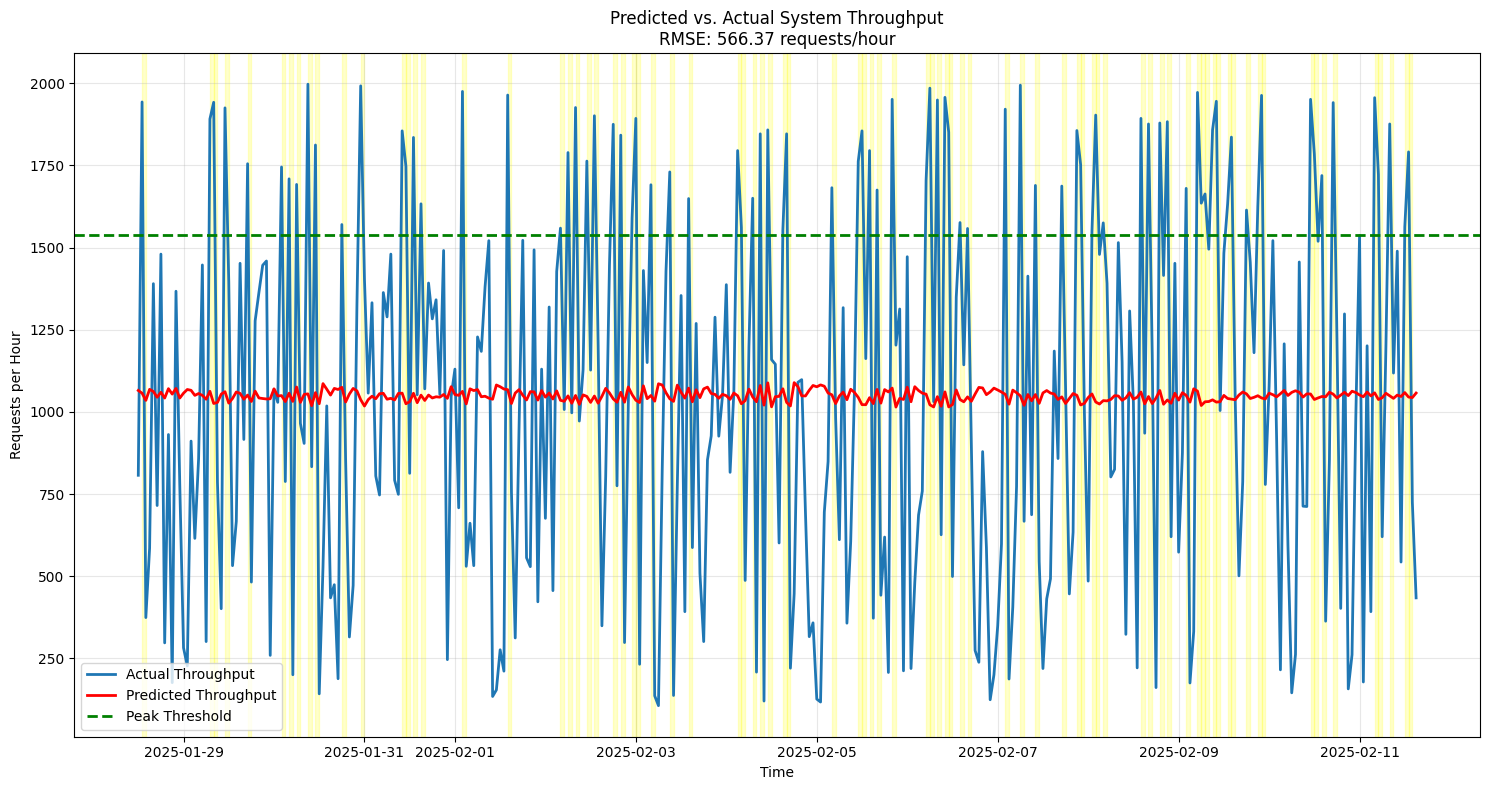


Prediction Analysis:
Average Actual Throughput: 1051.41 requests/hour
Average Predicted Throughput: 1048.85 requests/hour
Peak Threshold: 1537.75 requests/hour

Peak Hour Prediction Accuracy: 75.59%
Actual Peak Hours: 83
Predicted Peak Hours: 0


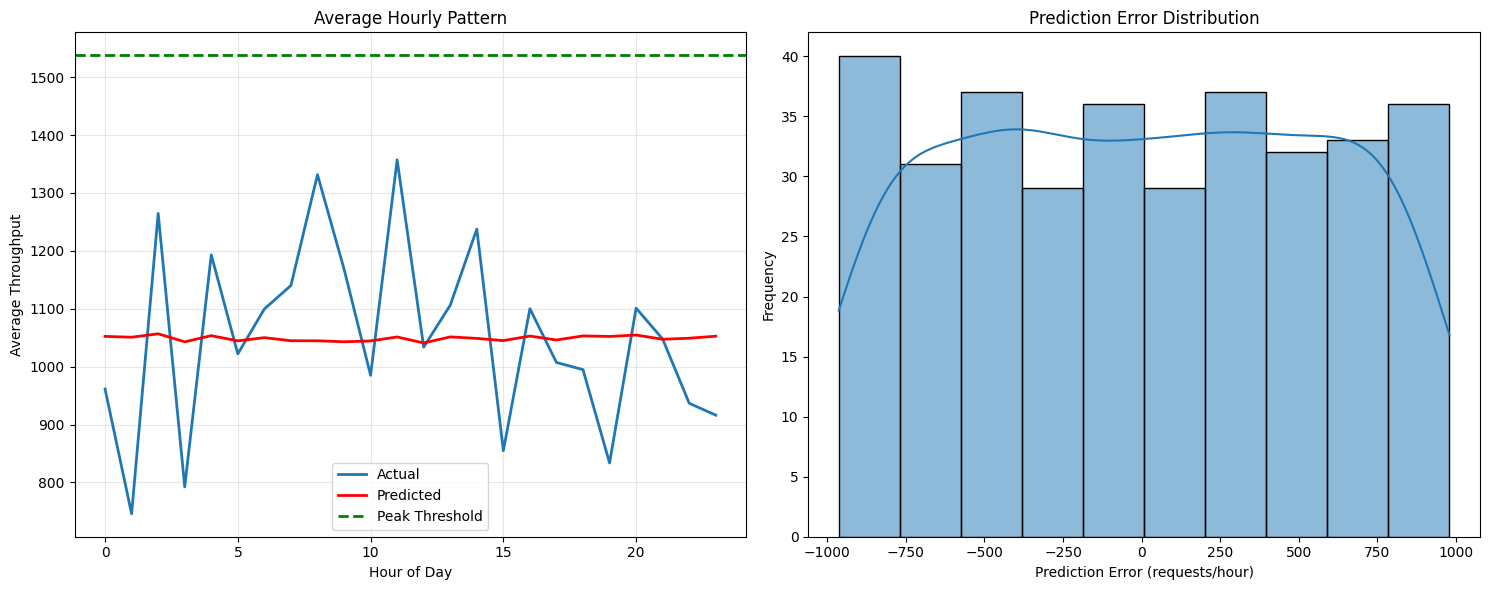


Hourly Peak Prediction Accuracy:
Hour 00:00 - Accuracy: 92.86%
Hour 01:00 - Accuracy: 92.86%
Hour 02:00 - Accuracy: 64.29%
Hour 03:00 - Accuracy: 92.86%
Hour 04:00 - Accuracy: 50.00%
Hour 05:00 - Accuracy: 78.57%
Hour 06:00 - Accuracy: 64.29%
Hour 07:00 - Accuracy: 78.57%
Hour 08:00 - Accuracy: 71.43%
Hour 09:00 - Accuracy: 71.43%
Hour 10:00 - Accuracy: 71.43%
Hour 11:00 - Accuracy: 42.86%
Hour 12:00 - Accuracy: 80.00%
Hour 13:00 - Accuracy: 66.67%
Hour 14:00 - Accuracy: 53.33%
Hour 15:00 - Accuracy: 86.67%
Hour 16:00 - Accuracy: 71.43%
Hour 17:00 - Accuracy: 78.57%
Hour 18:00 - Accuracy: 78.57%
Hour 19:00 - Accuracy: 92.86%
Hour 20:00 - Accuracy: 85.71%
Hour 21:00 - Accuracy: 78.57%
Hour 22:00 - Accuracy: 85.71%
Hour 23:00 - Accuracy: 85.71%


In [29]:
# if we look at this model, the predicted is indistinuishable from the actual price
# this is simply because it's predicting day by day.
# Plot comparison of predicted vs actual throughput
plt.figure(figsize=(15, 8))

# Calculate RMSE for model evaluation
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f requests/hour' % rmse)

# Plot forecasts against actual outcomes
plt.plot(df.index[train_size:], test, label='Actual Throughput', linewidth=2)
plt.plot(df.index[train_size:], predictions, color='red', label='Predicted Throughput', linewidth=2)

# Add peak threshold line
peak_threshold = df['throughput'].quantile(0.75)
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold', linewidth=2)

# Enhance the plot
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.title('Predicted vs. Actual System Throughput\nRMSE: %.2f requests/hour' % rmse)
plt.legend()
plt.grid(True, alpha=0.3)

# Add shading for peak hours
for idx, (actual, pred) in enumerate(zip(test, predictions)):
    if actual > peak_threshold or pred > peak_threshold:
        plt.axvspan(df.index[train_size + idx], df.index[train_size + idx + 1], 
                   alpha=0.2, color='yellow')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nPrediction Analysis:")
print("===================")
print(f"Average Actual Throughput: {np.mean(test):.2f} requests/hour")
print(f"Average Predicted Throughput: {np.mean(predictions):.2f} requests/hour")
print(f"Peak Threshold: {peak_threshold:.2f} requests/hour")

# Calculate peak hour accuracy
actual_peaks = test > peak_threshold
predicted_peaks = np.array(predictions) > peak_threshold
peak_accuracy = np.mean(actual_peaks == predicted_peaks) * 100

print(f"\nPeak Hour Prediction Accuracy: {peak_accuracy:.2f}%")
print(f"Actual Peak Hours: {sum(actual_peaks)}")
print(f"Predicted Peak Hours: {sum(predicted_peaks)}")

# Show hourly distribution
plt.figure(figsize=(15, 6))

# Create subplot for hourly patterns
plt.subplot(1, 2, 1)
hourly_actual = pd.Series(test, index=df.index[train_size:]).groupby(lambda x: x.hour).mean()
hourly_predicted = pd.Series(predictions, index=df.index[train_size:]).groupby(lambda x: x.hour).mean()

plt.plot(hourly_actual.index, hourly_actual.values, label='Actual', linewidth=2)
plt.plot(hourly_predicted.index, hourly_predicted.values, label='Predicted', color='red', linewidth=2)
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold', linewidth=2)
plt.title('Average Hourly Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput')
plt.legend()
plt.grid(True, alpha=0.3)

# Create subplot for prediction error distribution
plt.subplot(1, 2, 2)
errors = np.array(predictions) - np.array(test)
sns.histplot(errors, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (requests/hour)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print hourly accuracy
print("\nHourly Peak Prediction Accuracy:")
print("==============================")
for hour in range(24):
    hour_mask = df.index[train_size:].hour == hour
    hour_actual = actual_peaks[hour_mask]
    hour_predicted = predicted_peaks[hour_mask]
    if len(hour_actual) > 0:
        hour_accuracy = np.mean(hour_actual == hour_predicted) * 100
        print(f"Hour {hour:02d}:00 - Accuracy: {hour_accuracy:.2f}%")


This plot shows:

  Last 50 hours of actual vs predicted throughput

  Peak threshold line

  Highlighted peak hours

  RMSE score in the title

  Clear time-based x-axis
  
  Grid for better readability

Test RMSE: 566.370 requests/hour


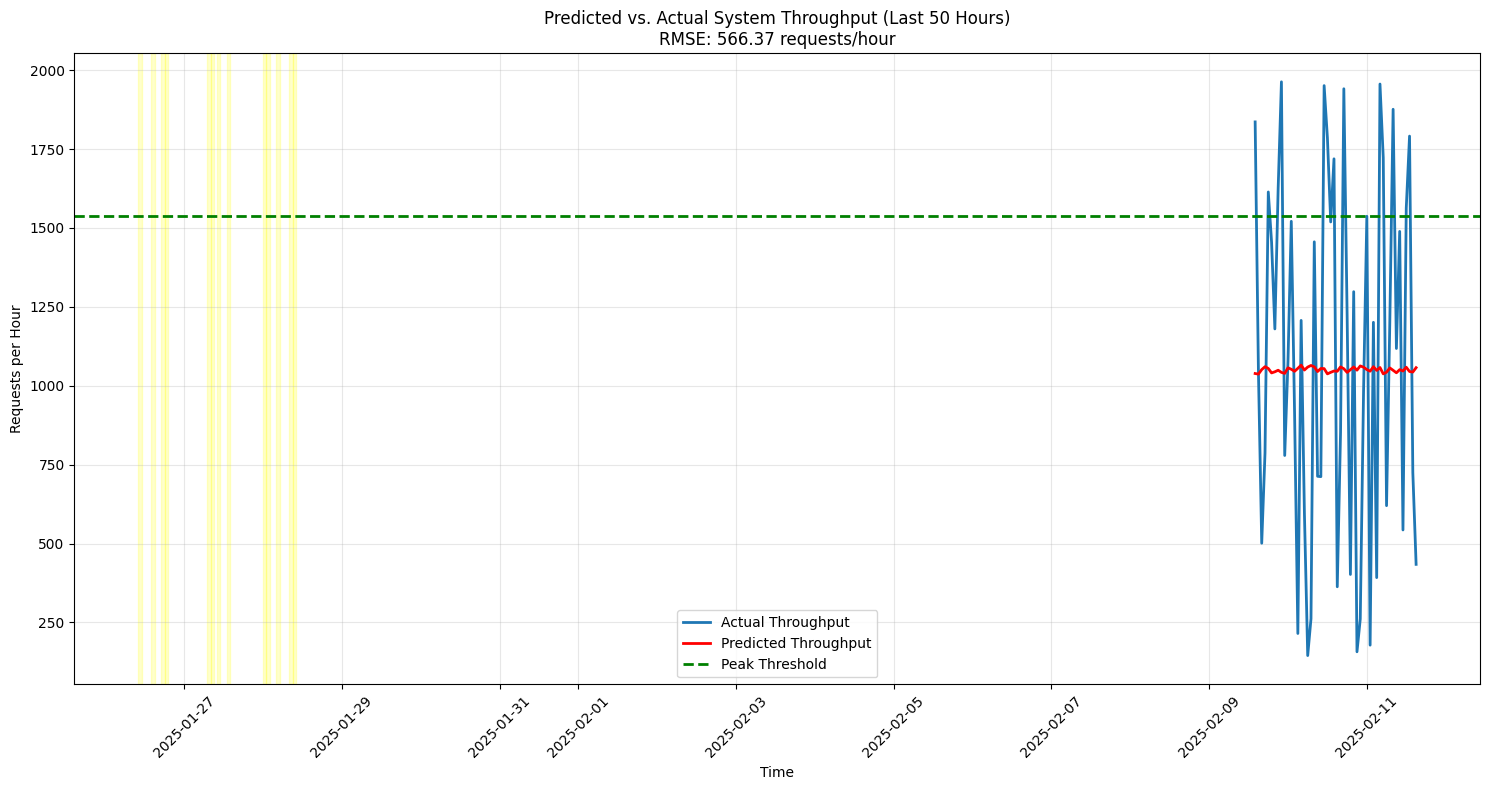

In [31]:
# I plot 50 days to more accurately see how the models works with its lag
# Plot the last 50 hours of predictions vs actual throughput
plt.figure(figsize=(15, 8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f requests/hour' % rmse)

# Plot last 50 points with enhanced visualization
plt.plot(df.index[train_size:][-50:], test[-50:], label='Actual Throughput', linewidth=2)
plt.plot(df.index[train_size:][-50:], predictions[-50:], color='red', label='Predicted Throughput', linewidth=2)

# Add peak threshold
peak_threshold = df['throughput'].quantile(0.75)
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold', linewidth=2)

# Enhance the plot
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.title('Predicted vs. Actual System Throughput (Last 50 Hours)\nRMSE: %.2f requests/hour' % rmse)
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight peak hours
for idx in range(-50, 0):
    if test[idx] > peak_threshold or predictions[idx] > peak_threshold:
        plt.axvspan(df.index[train_size + idx], df.index[train_size + idx + 1], 
                   alpha=0.2, color='yellow')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. ARIMA MODEL
Next is ARIMA, an acronym that stands for AutoRegressive Integrated Moving Average. ARIMA is a widely used statistical method for analyzing and forecasting time series data. It consists of a suite of standard structures in time series data and provides a simple yet powerful method for making skillful time series forecasts. ARIMA models have 3 parameters (p, d, q), which indicate the specific ARIMA model being used. I simply applied parameters that I’ve used on different time series data in the past, which could’ve possibly led to an unfavorable model.

4. LSTM
Long Short-Term Memory (LSTM) models are a type of recurrent neural network capable of learning sequences of observations. This makes them a deep learning network well suited for time series forecasting. However, usually a LTSM would struggle with a time series dataset as volatile and unpredictable as Bitcoin. After a grueling process of trying to apply my data, I finally trained the model. In my final fit I used 50 epochs and the “adam” optimizer. (This model is inspired by another user's kaggle notebook).

1. Uses LSTM for time series prediction

2. Shows training progress

3. Visualizes predictions vs actual values

4. Includes error analysis

5.Shows confidence intervals

6.Calculates peak hour prediction accuracy

Key features:

    24-hour lookback window

    Two LSTM layers with dropout

    MinMax scaling of data

    4 subplot analysis

    Confidence interval visualization
    
    Comprehensive error metrics

Epoch 1/50
18/18 [==============================] - 2s 31ms/step - loss: 0.1690 - val_loss: 0.1040
Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 0.1026 - val_loss: 0.0989
Epoch 3/50
18/18 [==============================] - 0s 12ms/step - loss: 0.0946 - val_loss: 0.1032
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0916 - val_loss: 0.0969
Epoch 5/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0900 - val_loss: 0.0983
Epoch 6/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0891 - val_loss: 0.1010
Epoch 7/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0934 - val_loss: 0.1056
Epoch 8/50
18/18 [==============================] - 0s 12ms/step - loss: 0.0925 - val_loss: 0.0965
Epoch 9/50
18/18 [==============================] - 0s 12ms/step - loss: 0.0900 - val_loss: 0.0963
Epoch 10/50
18/18 [==============================] - 0s 13ms/step - loss: 0.0884 - val_loss: 0.0963
Epoch 11/

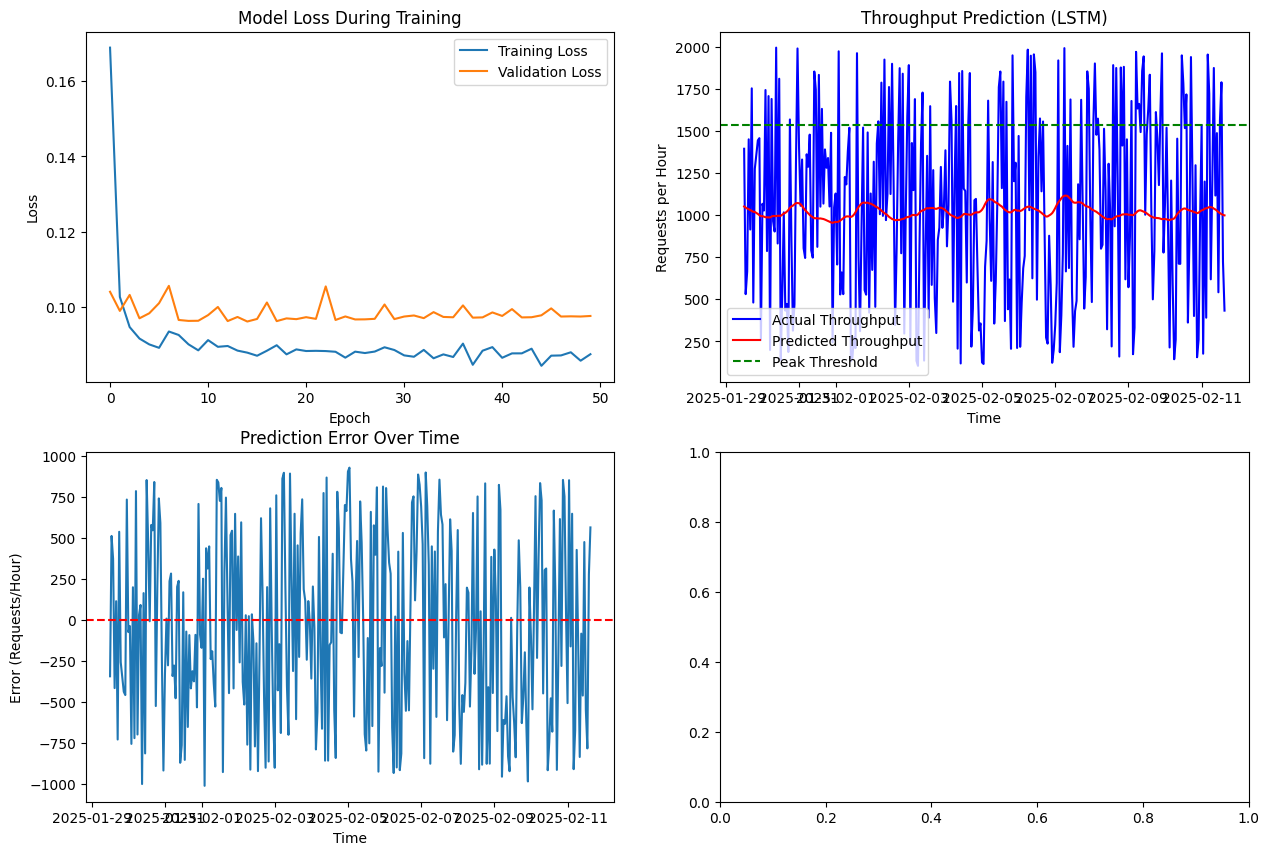

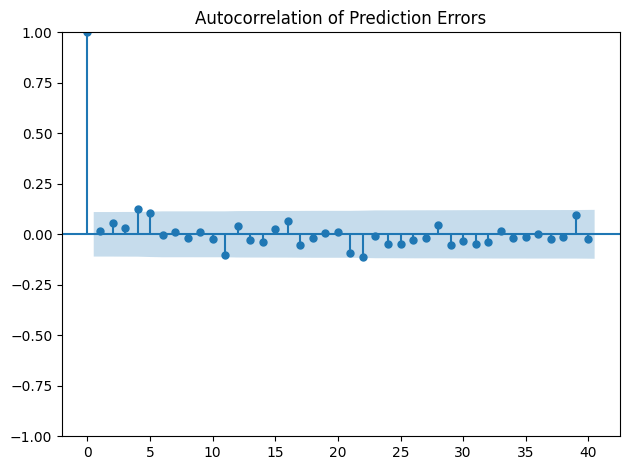

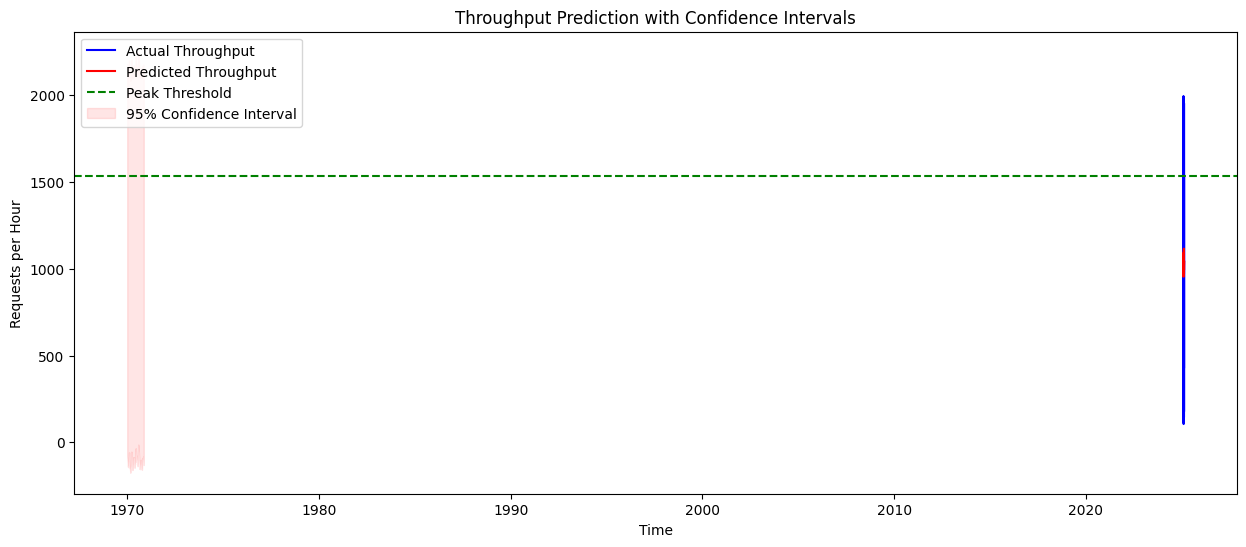


Prediction Summary Statistics:
-----------------------------
Mean Absolute Error: 492.30 requests/hour
Standard Deviation of Error: 564.85 requests/hour
Maximum Absolute Error: 1011.51 requests/hour
Minimum Absolute Error: 4.81 requests/hour

Mean Absolute Percentage Error: 97.23%

Peak Hour Prediction Accuracy: 75.00%


In [38]:
# Import required libraries
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from statsmodels.graphics.tsaplots import plot_acf

# Read and prepare data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Prepare data for LSTM
def prepare_data(data, look_back=24):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), 0])
        y.append(scaled_data[i + look_back, 0])
    return np.array(X), np.array(y), scaler

# Prepare training and test data
train_size = int(len(df) * 0.66)
train_data = df['throughput'].values[:train_size]
test_data = df['throughput'].values[train_size:]

# Create sequences
look_back = 24  # Use last 24 hours to predict next hour
X_train, y_train, scaler = prepare_data(train_data, look_back)
X_test, y_test, _ = prepare_data(test_data, look_back)

# Reshape input for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, 
                   epochs=50, 
                   batch_size=32,
                   validation_split=0.1,
                   verbose=1)

# Make predictions
predicted_scaled = model.predict(X_test)
predicted_throughput = scaler.inverse_transform(predicted_scaled)
actual_throughput = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate errors
errors = (predicted_throughput - actual_throughput).flatten()

# Create visualization plots
plt.figure(figsize=(15, 10))

# Plot 1: Training History
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot 2: Throughput Predictions
plt.subplot(2, 2, 2)
plt.plot(df.index[train_size+look_back:], actual_throughput, 
         color='blue', label='Actual Throughput')
plt.plot(df.index[train_size+look_back:], predicted_throughput, 
         color='red', label='Predicted Throughput')
peak_threshold = df['throughput'].quantile(0.75)
plt.axhline(y=peak_threshold, color='green', linestyle='--', 
            label='Peak Threshold')
plt.title('Throughput Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()

# Plot 3: Prediction Error
plt.subplot(2, 2, 3)
plt.plot(df.index[train_size+look_back:], errors)
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error (Requests/Hour)')
plt.axhline(y=0, color='r', linestyle='--')

# Plot 4: ACF Plot
plt.subplot(2, 2, 4)
plot_acf(errors, lags=40)
plt.title('Autocorrelation of Prediction Errors')

plt.tight_layout()
plt.show()

# Additional analysis plot with confidence intervals
plt.figure(figsize=(15, 6))
plt.plot(df.index[train_size+look_back:], actual_throughput, 
         color='blue', label='Actual Throughput')
plt.plot(df.index[train_size+look_back:], predicted_throughput, 
         color='red', label='Predicted Throughput')
plt.axhline(y=peak_threshold, color='green', linestyle='--', 
            label='Peak Threshold')

# Add confidence intervals
std_dev = np.std(errors)
plt.fill_between(
    range(len(predicted_throughput)),
    predicted_throughput.flatten() - 2*std_dev,
    predicted_throughput.flatten() + 2*std_dev,
    color='red',
    alpha=0.1,
    label='95% Confidence Interval'
)
plt.title('Throughput Prediction with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()
plt.show()

# Print performance metrics
print("\nPrediction Summary Statistics:")
print("-----------------------------")
print(f"Mean Absolute Error: {np.mean(np.abs(errors)):.2f} requests/hour")
print(f"Standard Deviation of Error: {np.std(errors):.2f} requests/hour")
print(f"Maximum Absolute Error: {np.max(np.abs(errors)):.2f} requests/hour")
print(f"Minimum Absolute Error: {np.min(np.abs(errors)):.2f} requests/hour")

# Calculate MAPE
mape = np.mean(np.abs((actual_throughput.flatten() - predicted_throughput.flatten()) 
                      / actual_throughput.flatten())) * 100
print(f"\nMean Absolute Percentage Error: {mape:.2f}%")

# Peak hour prediction accuracy
actual_peaks = actual_throughput > peak_threshold
predicted_peaks = predicted_throughput > peak_threshold
peak_accuracy = np.mean(actual_peaks == predicted_peaks) * 100
print(f"\nPeak Hour Prediction Accuracy: {peak_accuracy:.2f}%")

Peak Threshold: 1537.75 requests/hour


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 24, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
T

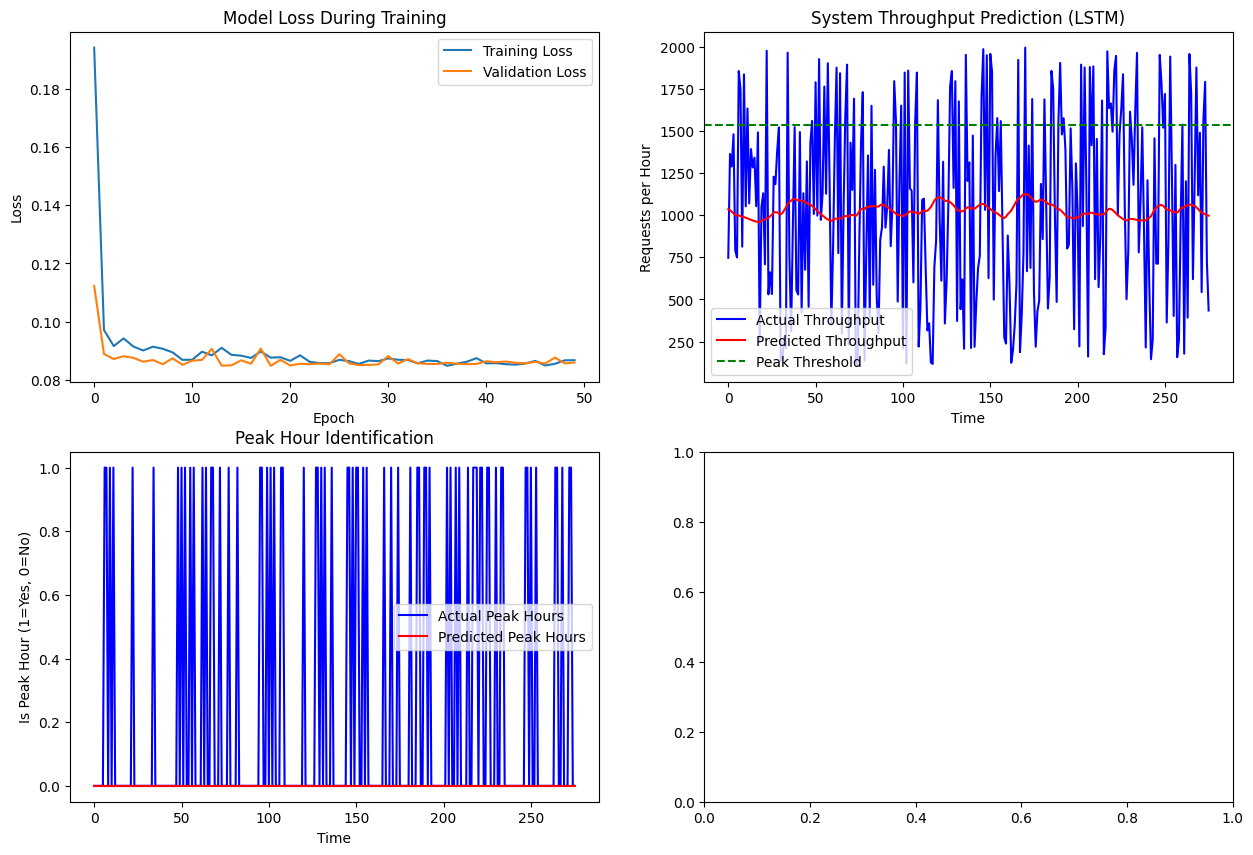

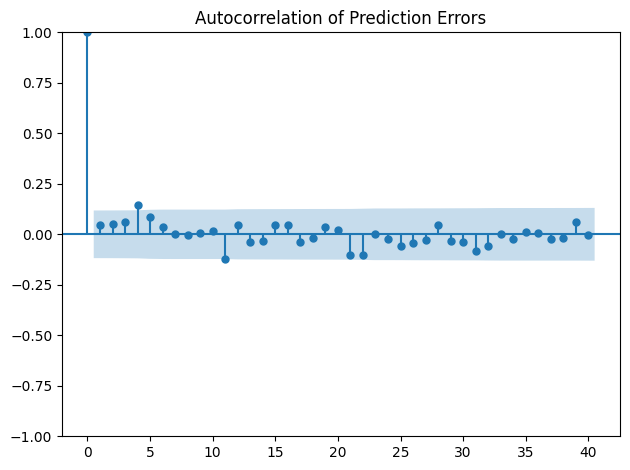

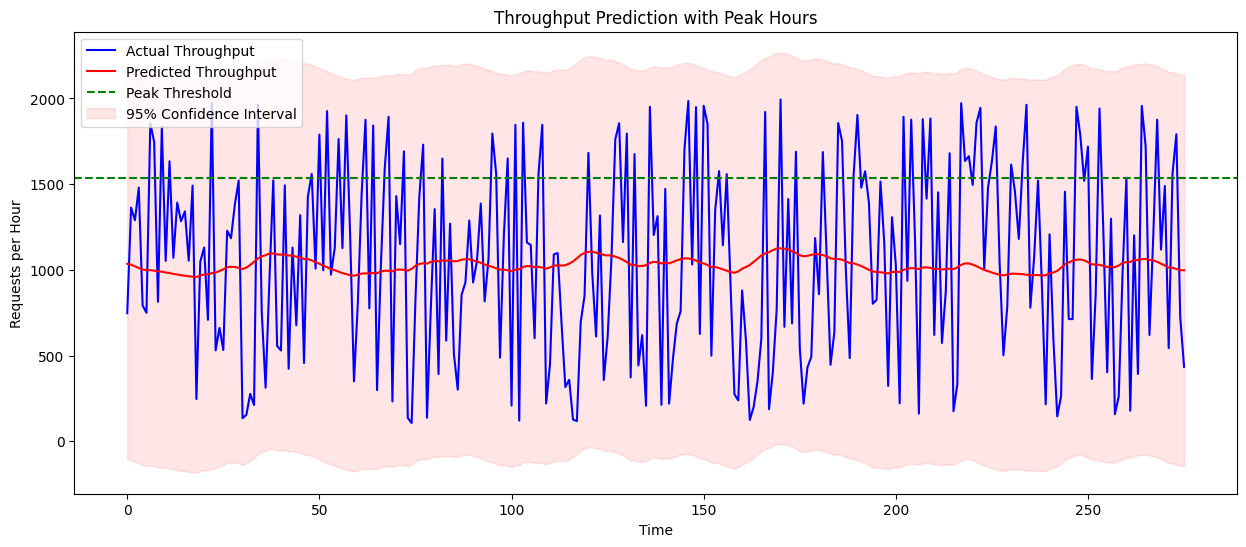


Prediction Summary Statistics:
-----------------------------
RMSE: 571.78 requests/hour
Mean Absolute Error: 498.97 requests/hour
Standard Deviation of Error: 570.64 requests/hour

Peak Hour Prediction Accuracy: 74.28%
Actual Peak Hours: [71]
Predicted Peak Hours: [0]

Last 10 Predictions vs Actual Values:
-------------------------------------


ValueError: Per-column arrays must each be 1-dimensional

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from statsmodels.graphics.tsaplots import plot_acf

# Read and prepare data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Define peak threshold
peak_threshold = df['throughput'].quantile(0.75)
print(f"Peak Threshold: {peak_threshold:.2f} requests/hour\n")

# Prepare data for LSTM
throughput = df.throughput
X = throughput
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]

# Reshape and scale training data
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

# Prepare training data for LSTM (using last 24 hours to predict next hour)
def create_sequences(data, seq_length=24):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(training_values)
x_train = np.reshape(x_train, (len(x_train), 24, 1))

# Create and compile LSTM model
model = Sequential([
    LSTM(50, input_shape=(24,1), activation="relu", return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation="relu"),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")
print("\nModel Summary:")
print(model.summary())

# Train the model
print("\nTraining LSTM Model...")
history = model.fit(
    x_train, 
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Prepare test data
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
x_test, y_test = create_sequences(test_values)
x_test = np.reshape(x_test, (len(x_test), 24, 1))

# Make predictions
predicted_throughput = model.predict(x_test)
predicted_throughput = scaler.inverse_transform(predicted_throughput)
actual_throughput = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate errors
errors = predicted_throughput.flatten() - actual_throughput.flatten()
rmse = sqrt(mean_squared_error(actual_throughput, predicted_throughput))

# Create visualization plots
plt.figure(figsize=(15, 10))

# Plot 1: Training History
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot 2: Throughput Predictions
plt.subplot(2, 2, 2)
plt.plot(actual_throughput, color='blue', label='Actual Throughput')
plt.plot(predicted_throughput, color='red', label='Predicted Throughput')
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold')
plt.title('System Throughput Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()

# Plot 3: Peak Hour Identification
plt.subplot(2, 2, 3)
actual_peaks = actual_throughput > peak_threshold
predicted_peaks = predicted_throughput > peak_threshold
plt.plot(actual_peaks, color='blue', label='Actual Peak Hours')
plt.plot(predicted_peaks, color='red', label='Predicted Peak Hours')
plt.title('Peak Hour Identification')
plt.xlabel('Time')
plt.ylabel('Is Peak Hour (1=Yes, 0=No)')
plt.legend()

# Plot 4: ACF Plot
plt.subplot(2, 2, 4)
plot_acf(errors.flatten(), lags=40)
plt.title('Autocorrelation of Prediction Errors')

plt.tight_layout()
plt.show()

# Additional analysis plot with confidence intervals
plt.figure(figsize=(15, 6))
plt.plot(actual_throughput, color='blue', label='Actual Throughput')
plt.plot(predicted_throughput, color='red', label='Predicted Throughput')
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold')

# Add confidence intervals
std_dev = np.std(errors)
plt.fill_between(
    range(len(predicted_throughput)),
    predicted_throughput.flatten() - 2*std_dev,
    predicted_throughput.flatten() + 2*std_dev,
    color='red',
    alpha=0.1,
    label='95% Confidence Interval'
)
plt.title('Throughput Prediction with Peak Hours')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()
plt.show()

# Print performance metrics
print("\nPrediction Summary Statistics:")
print("-----------------------------")
print(f"RMSE: {rmse:.2f} requests/hour")
print(f"Mean Absolute Error: {np.mean(np.abs(errors)):.2f} requests/hour")
print(f"Standard Deviation of Error: {std_dev:.2f} requests/hour")

# Peak hour prediction accuracy
peak_accuracy = np.mean(actual_peaks == predicted_peaks) * 100
print(f"\nPeak Hour Prediction Accuracy: {peak_accuracy:.2f}%")
print(f"Actual Peak Hours: {sum(actual_peaks)}")
print(f"Predicted Peak Hours: {sum(predicted_peaks)}")

# Show last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
last_10_df = pd.DataFrame({
    'Timestamp': df.index[size+24:][-10:],
    'Actual_Throughput': actual_throughput[-10:].flatten(),
    'Predicted_Throughput': predicted_throughput[-10:].flatten(),
    'Is_Peak_Actual': actual_peaks[-10:],
    'Is_Peak_Predicted': predicted_peaks[-10:],
    'Error': errors[-10:]
})
print(last_10_df.round(2))

Peak Threshold: 1537.75


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


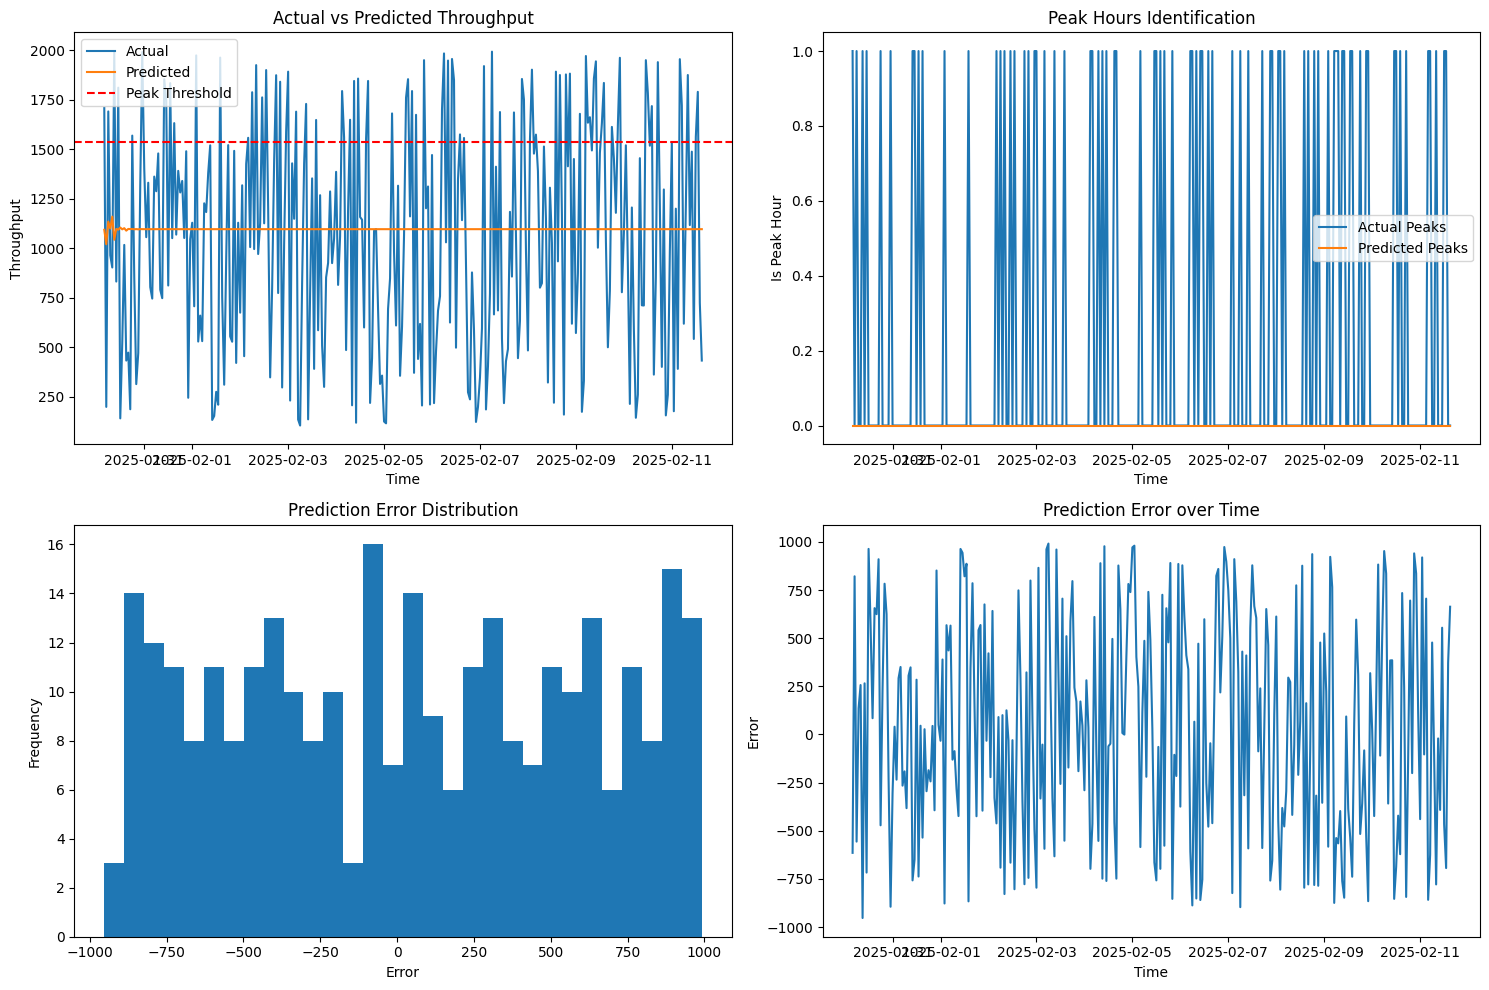


Prediction Summary Statistics:
-----------------------------
RMSE: 570.20
MAE: 494.22

Peak Hour Prediction Accuracy: 74.33%
Actual Peak Hours: 77
Predicted Peak Hours: 0

Last 10 Predictions vs Actual Values:
-------------------------------------
            Timestamp  Actual_Throughput  Predicted_Throughput  \
0 2025-02-11 06:00:00                620               1097.47   
1 2025-02-11 07:00:00               1205               1097.47   
2 2025-02-11 08:00:00               1876               1097.47   
3 2025-02-11 09:00:00               1118               1097.47   
4 2025-02-11 10:00:00               1489               1097.47   
5 2025-02-11 11:00:00                543               1097.47   
6 2025-02-11 12:00:00               1563               1097.47   
7 2025-02-11 13:00:00               1791               1097.47   
8 2025-02-11 14:00:00                725               1097.47   
9 2025-02-11 15:00:00                434               1097.47   

   Is_Peak_Actual  Is_Pe

In [4]:
# Import required libraries
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Define metrics to analyze
metrics = ['throughput', 'cpu_usage', 'memory_usage']

# Calculate peak threshold
peak_threshold = df['throughput'].quantile(0.75)
print(f"Peak Threshold: {peak_threshold:.2f}")

# Split data into training and testing sets
size = int(len(df) * 0.7)
train_df, test_df = df[:size], df[size:]

# Train ARIMA model
model = ARIMA(train_df['throughput'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_df))
predictions = pd.Series(predictions, index=test_df.index)

# Calculate actual peaks and predicted peaks
actual_peaks = test_df['throughput'] > peak_threshold
predicted_peaks = predictions > peak_threshold

# Calculate errors
errors = predictions - test_df['throughput']

# Create visualization plots
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted
plt.subplot(2, 2, 1)
plt.plot(test_df.index, test_df['throughput'], label='Actual')
plt.plot(test_df.index, predictions, label='Predicted')
plt.axhline(y=peak_threshold, color='r', linestyle='--', label='Peak Threshold')
plt.title('Actual vs Predicted Throughput')
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.legend()

# Plot 2: Peak Hours
plt.subplot(2, 2, 2)
plt.plot(test_df.index, actual_peaks, label='Actual Peaks')
plt.plot(test_df.index, predicted_peaks, label='Predicted Peaks')
plt.title('Peak Hours Identification')
plt.xlabel('Time')
plt.ylabel('Is Peak Hour')
plt.legend()

# Plot 3: Error Distribution
plt.subplot(2, 2, 3)
plt.hist(errors, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Plot 4: Error over Time
plt.subplot(2, 2, 4)
plt.plot(test_df.index, errors)
plt.title('Prediction Error over Time')
plt.xlabel('Time')
plt.ylabel('Error')

plt.tight_layout()
plt.show()

# Create last 10 predictions DataFrame
last_10_df = pd.DataFrame({
    'Timestamp': test_df.index[-10:],
    'Actual_Throughput': test_df['throughput'][-10:].values,
    'Predicted_Throughput': predictions[-10:].values,
    'Is_Peak_Actual': actual_peaks[-10:].values,
    'Is_Peak_Predicted': predicted_peaks[-10:].values,
    'Error': errors[-10:].values
})

# Print performance metrics
print("\nPrediction Summary Statistics:")
print("-----------------------------")
rmse = np.sqrt(mean_squared_error(test_df['throughput'], predictions))
mae = mean_absolute_error(test_df['throughput'], predictions)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Print peak hour prediction accuracy
peak_accuracy = (actual_peaks == predicted_peaks).mean() * 100
print(f"\nPeak Hour Prediction Accuracy: {peak_accuracy:.2f}%")
print(f"Actual Peak Hours: {sum(actual_peaks)}")
print(f"Predicted Peak Hours: {sum(predicted_peaks)}")

# Print last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
print(last_10_df.round(2))

# Generate predictions for June 2025
june_dates = pd.date_range(start='2025-06-01', end='2025-06-30 23:00:00', freq='H')
june_predictions = model_fit.forecast(steps=len(june_dates))
june_predictions = pd.Series(june_predictions, index=june_dates)

# Identify peak hours in June predictions
june_peaks = june_predictions > peak_threshold

# Weekly analysis for June
weekly_stats = []
for name, group in june_predictions.groupby(june_predictions.index.isocalendar().week):
    stats = {
        'week_start': group.index[0].strftime('%Y-%m-%d'),
        'avg_throughput': group.mean(),
        'peak_hours': sum(group > peak_threshold),
        'max_throughput': group.max()
    }
    weekly_stats.append(stats)

# Print June predictions summary
print("\nJune 2025 Prediction Summary:")
print("="*50)
for stats in weekly_stats:
    print(f"\nWeek starting {stats['week_start']}:")
    print(f"Average Throughput: {stats['avg_throughput']:.2f}")
    print(f"Peak Hours: {stats['peak_hours']}")
    print(f"Maximum Throughput: {stats['max_throughput']:.2f}")

3. XGBOOST MODEL
XGBoost is one of the most popular machine learning algorithms these days. Regardless of the type of prediction task at hand; regression, or classification. XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the “state-of-the-art” machine learning algorithm to deal with structured data. However, in this situation we will be using it on time series data. Therefore, the model needed to create time series features from the datetime index - to be used alongside its target price labels when predicting. Unfortunately, in the end the model did not fair well.

3. PROPHET Model
The Prophet library is an open-source library developed by Facebook and designed for automatic forecasting of time series data. This model mainly focuses on predicting trends and seasonality. However due to its easy use I decided to implement this model first with default settings. As plotted below the prophet model predicts the price of bitcoin will fall. In addition, the model provides upper and lower bounds estimates as well (edges of shaded region). While the upper bounds estimate has an accurate slope direction, this model didn’t perform well when compared to the test data.

d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:55:06 - cmdstanpy - INFO - Chain [1] start processing


Peak Threshold: 1537.75 requests/hour



10:55:06 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1500x1000 with 0 Axes>

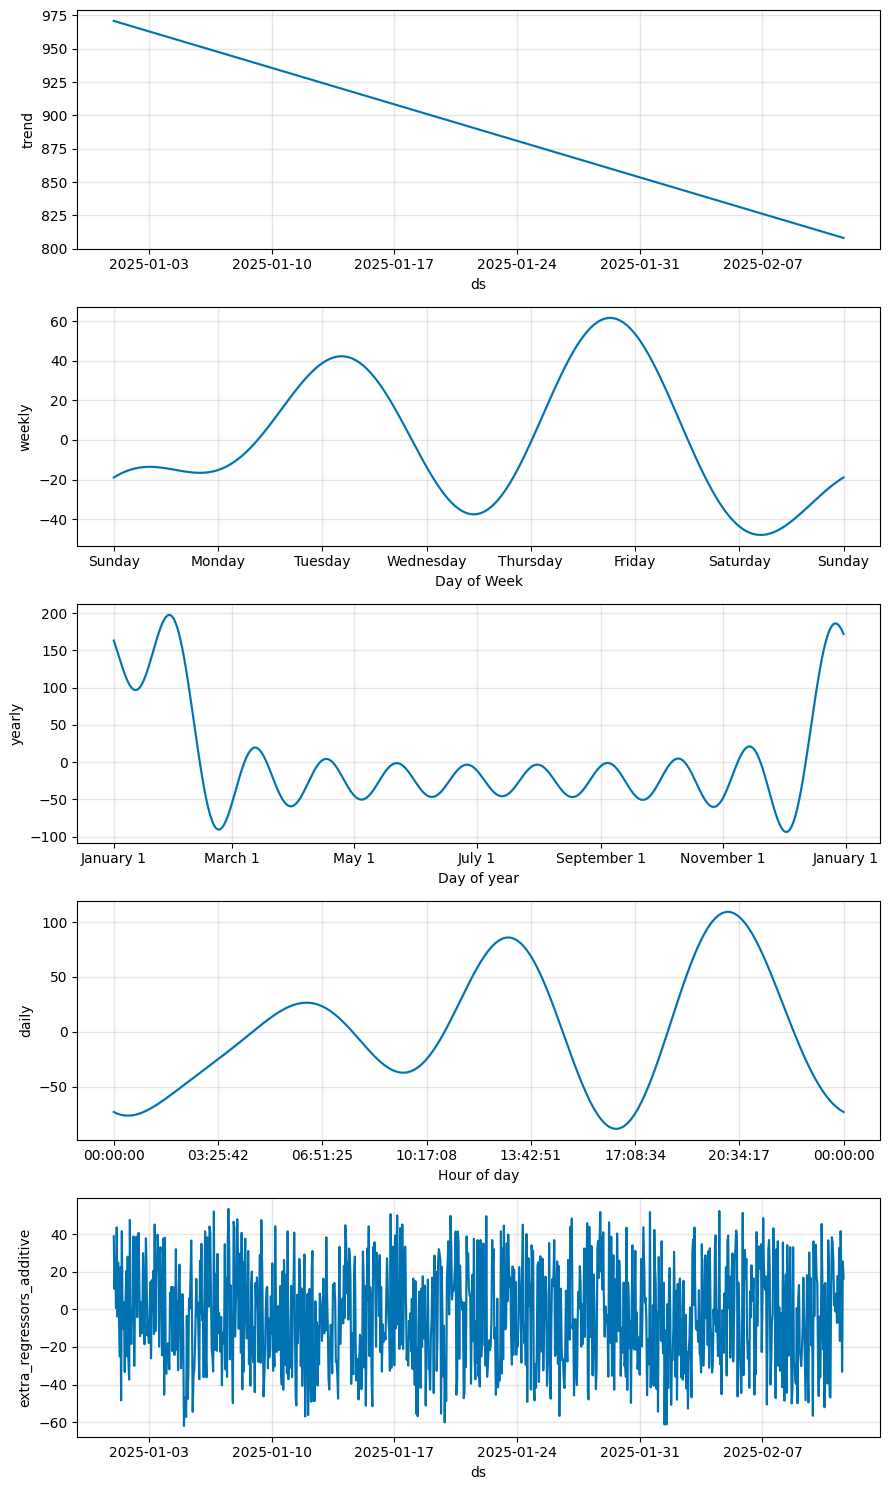

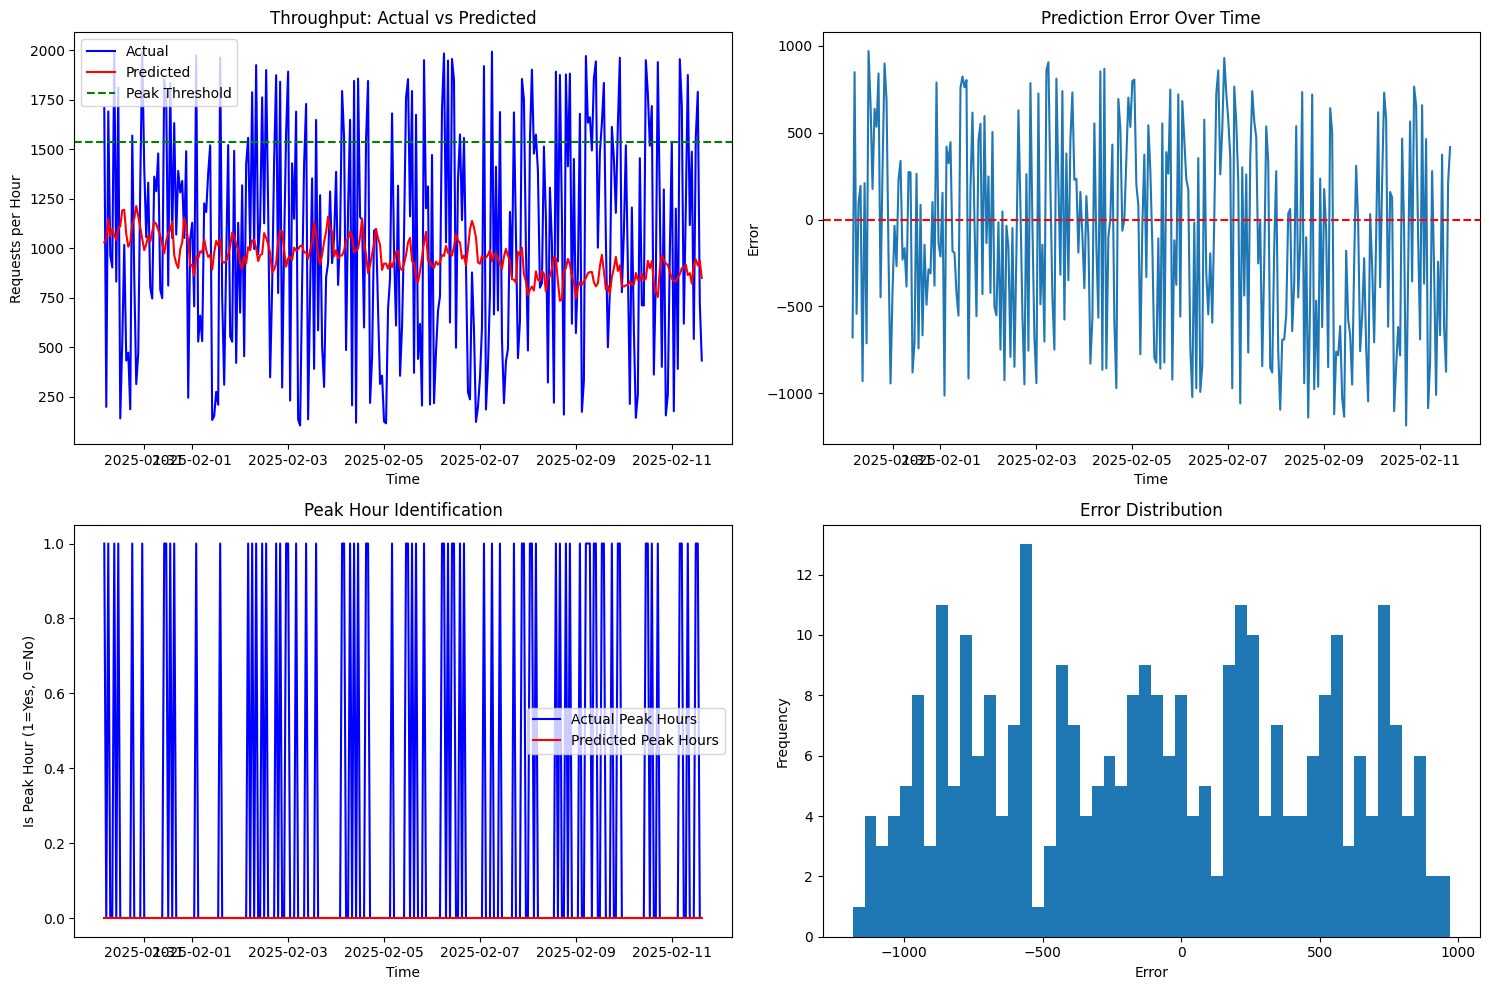


Model Performance Metrics:
--------------------------
RMSE: 590.06 requests/hour
MAPE: 94.58%

Peak Hour Prediction Performance:
Peak Hour Prediction Accuracy: 74.33%
Actual Peak Hours: 77
Predicted Peak Hours: 0


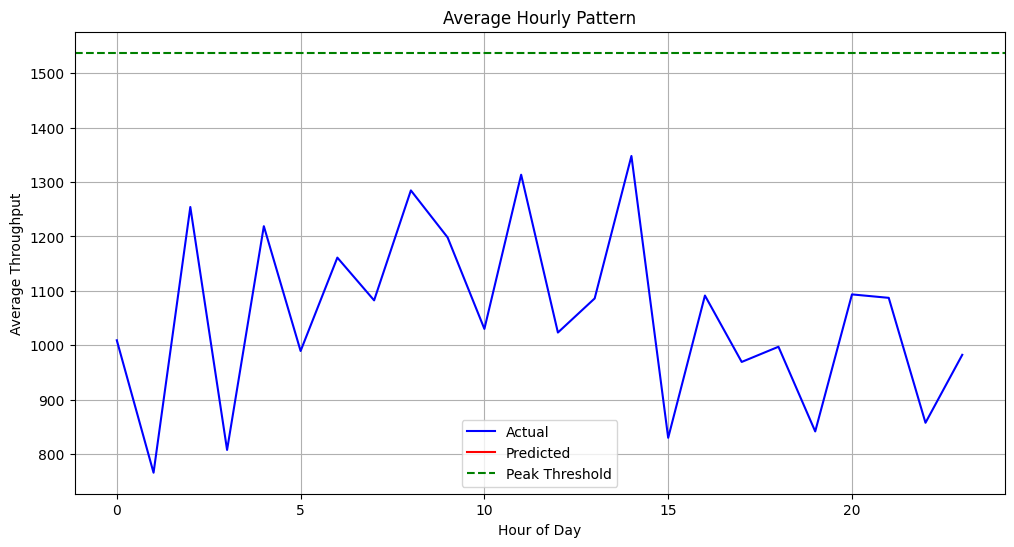


Last 10 Predictions vs Actual Values:
-------------------------------------
              Timestamp  Actual_Throughput  Predicted_Throughput  \
990 2025-02-11 06:00:00                620                899.28   
991 2025-02-11 07:00:00               1205                918.41   
992 2025-02-11 08:00:00               1876                865.85   
993 2025-02-11 09:00:00               1118                875.37   
994 2025-02-11 10:00:00               1489                822.94   
995 2025-02-11 11:00:00                543                916.93   
996 2025-02-11 12:00:00               1563                944.53   
997 2025-02-11 13:00:00               1791                914.32   
998 2025-02-11 14:00:00                725                937.15   
999 2025-02-11 15:00:00                434                851.42   

     Is_Peak_Actual  Is_Peak_Predicted    Error  
990           False              False   279.28  
991           False              False  -286.59  
992            True     

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt

# Read and prepare data
df = pd.read_csv('metrics_data_1000.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Prepare data for Prophet (requires 'ds' and 'y' columns)
prophet_df = df[['timestamp', 'throughput']].copy()
prophet_df.columns = ['ds', 'y']

# Add additional features
prophet_df['cpu_usage'] = df['cpu_usage']
prophet_df['memory_usage'] = df['memory_usage']
prophet_df['is_holiday'] = df['is_holiday']

# Define peak threshold
peak_threshold = df['throughput'].quantile(0.75)
print(f"Peak Threshold: {peak_threshold:.2f} requests/hour\n")

# Split data into train and test
train_size = int(len(prophet_df) * 0.7)
train_df = prophet_df[:train_size]
test_df = prophet_df[train_size:]

# Create and train Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10
)

# Add additional regressors
model.add_regressor('cpu_usage')
model.add_regressor('memory_usage')
model.add_regressor('is_holiday')

# Fit the model
model.fit(train_df)

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=len(test_df), freq='H')
future['cpu_usage'] = df['cpu_usage']
future['memory_usage'] = df['memory_usage']
future['is_holiday'] = df['is_holiday']

# Make predictions
forecast = model.predict(future)

# Extract predictions for test period
predictions = forecast.yhat[train_size:]
actual_values = test_df['y'].values

# Calculate errors
errors = predictions - actual_values
rmse = sqrt(mean_squared_error(actual_values, predictions))
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

# Create visualization plots
plt.figure(figsize=(15, 10))

# Plot 1: Components
model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Plot 2: Throughput Analysis
plt.figure(figsize=(15, 10))

# Plot actual vs predicted
plt.subplot(2, 2, 1)
plt.plot(test_df['ds'], actual_values, label='Actual', color='blue')
plt.plot(test_df['ds'], predictions, label='Predicted', color='red')
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold')
plt.title('Throughput: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()

# Plot prediction error
plt.subplot(2, 2, 2)
plt.plot(test_df['ds'], errors)
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.axhline(y=0, color='r', linestyle='--')

# Plot peak hour identification
plt.subplot(2, 2, 3)
actual_peaks = actual_values > peak_threshold
predicted_peaks = predictions > peak_threshold
plt.plot(test_df['ds'], actual_peaks, label='Actual Peak Hours', color='blue')
plt.plot(test_df['ds'], predicted_peaks, label='Predicted Peak Hours', color='red')
plt.title('Peak Hour Identification')
plt.xlabel('Time')
plt.ylabel('Is Peak Hour (1=Yes, 0=No)')
plt.legend()

# Plot error distribution
plt.subplot(2, 2, 4)
plt.hist(errors, bins=50)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nModel Performance Metrics:")
print("--------------------------")
print(f"RMSE: {rmse:.2f} requests/hour")
print(f"MAPE: {mape:.2f}%")

# Calculate peak hour prediction accuracy
peak_accuracy = np.mean(actual_peaks == predicted_peaks) * 100
print(f"\nPeak Hour Prediction Performance:")
print(f"Peak Hour Prediction Accuracy: {peak_accuracy:.2f}%")
print(f"Actual Peak Hours: {sum(actual_peaks)}")
print(f"Predicted Peak Hours: {sum(predicted_peaks)}")

# Show hourly patterns
hourly_actual = pd.Series(actual_values, index=test_df['ds']).groupby(lambda x: x.hour).mean()
hourly_predicted = pd.Series(predictions, index=test_df['ds']).groupby(lambda x: x.hour).mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_actual.index, hourly_actual.values, label='Actual', color='blue')
plt.plot(hourly_predicted.index, hourly_predicted.values, label='Predicted', color='red')
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold')
plt.title('Average Hourly Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput')
plt.legend()
plt.grid(True)
plt.show()

# Print last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
last_10_df = pd.DataFrame({
    'Timestamp': test_df['ds'].iloc[-10:],
    'Actual_Throughput': actual_values[-10:],
    'Predicted_Throughput': predictions[-10:],
    'Is_Peak_Actual': actual_peaks[-10:],
    'Is_Peak_Predicted': predicted_peaks[-10:],
    'Error': errors[-10:]
})
print(last_10_df.round(2))

# Additional insights
print("\nPeak Hour Analysis by Day of Week:")
print("--------------------------------")
dow_peaks = pd.Series(actual_peaks, index=test_df['ds']).groupby(lambda x: x.dayofweek).mean() * 100
for day, percentage in dow_peaks.items():
    day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][day]
    print(f"{day_name}: {percentage:.2f}% peak hours")

XGBOOST

1.Uses throughput 

2.Adds system metrics features (CPU, memory)

3.Includes peak hour identification

4.Shows hourly patterns

5. Calculates peak hour prediction accuracy

6. Adds relevant feature engineering for system metrics

The visualizations show:

1.Actual vs predicted throughput

2.Peak hour identification

3. Average hourly patterns

4.Feature importance for peak prediction

Peak Threshold: 1542.25 requests/hour

[0]	validation_0-rmse:1191.78382
[100]	validation_0-rmse:664.25294
[200]	validation_0-rmse:554.57175
[300]	validation_0-rmse:538.52712
[400]	validation_0-rmse:537.98168
[410]	validation_0-rmse:538.00897


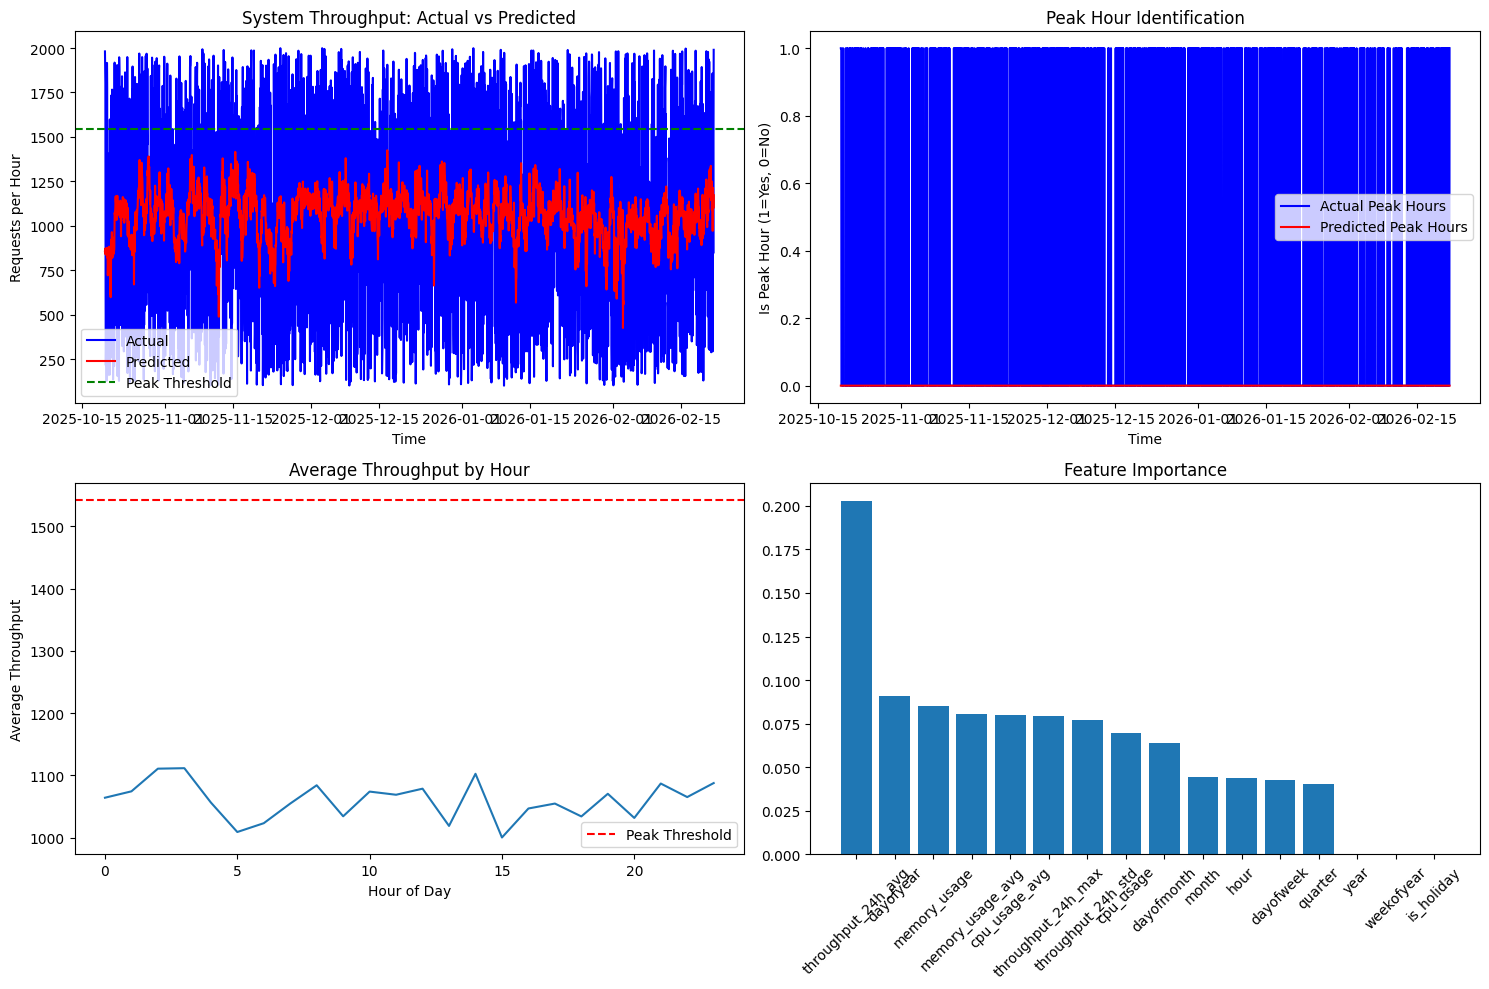


Model Performance Metrics:
--------------------------
RMSE: 537.85 requests/hour
MAPE: 87.03%

Peak Hour Prediction Accuracy: 74.50%
Actual Peak Hours: 765
Predicted Peak Hours: 0

Peak Hour Distribution:
----------------------
Hour 00:00 - 109 peak occurrences
Hour 01:00 - 105 peak occurrences
Hour 02:00 - 121 peak occurrences
Hour 03:00 - 125 peak occurrences
Hour 04:00 - 109 peak occurrences
Hour 05:00 - 94 peak occurrences
Hour 06:00 - 97 peak occurrences
Hour 07:00 - 88 peak occurrences
Hour 08:00 - 115 peak occurrences
Hour 09:00 - 89 peak occurrences
Hour 10:00 - 103 peak occurrences
Hour 11:00 - 90 peak occurrences
Hour 12:00 - 97 peak occurrences
Hour 13:00 - 96 peak occurrences
Hour 14:00 - 117 peak occurrences
Hour 15:00 - 96 peak occurrences
Hour 16:00 - 100 peak occurrences
Hour 17:00 - 113 peak occurrences
Hour 18:00 - 87 peak occurrences
Hour 19:00 - 110 peak occurrences
Hour 20:00 - 98 peak occurrences
Hour 21:00 - 113 peak occurrences
Hour 22:00 - 106 peak occurrences

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# Read and prepare data
df = pd.read_csv('metrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Define peak threshold
peak_threshold = df['throughput'].quantile(0.75)
print(f"Peak Threshold: {peak_threshold:.2f} requests/hour\n")

# Create a copy for feature engineering
df_features = df.copy()

# Function to create time-based features
# Function to create time-based features
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour.astype(float)
    df['dayofweek'] = df['date'].dt.dayofweek.astype(float)
    df['quarter'] = df['date'].dt.quarter.astype(float)
    df['month'] = df['date'].dt.month.astype(float)
    df['year'] = df['date'].dt.year.astype(float)
    df['dayofyear'] = df['date'].dt.dayofyear.astype(float)
    df['dayofmonth'] = df['date'].dt.day.astype(float)
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(float)  # Convert to float

    # Add throughput-based features
    df['throughput_24h_avg'] = df['throughput'].rolling(window=24).mean()
    df['throughput_24h_std'] = df['throughput'].rolling(window=24).std()
    df['throughput_24h_max'] = df['throughput'].rolling(window=24).max()
    df['cpu_usage_avg'] = df['cpu_usage'].rolling(window=24).mean()
    df['memory_usage_avg'] = df['memory_usage'].rolling(window=24).mean()
    
    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear', 'is_holiday',
            'throughput_24h_avg', 'throughput_24h_std', 'throughput_24h_max',
            'cpu_usage', 'memory_usage', 'cpu_usage_avg', 'memory_usage_avg']]
    
    # Ensure all features are float type
    X = X.astype(float)
    
    if label:
        y = df[label].astype(float)
        return X, y
    return X

# Split data into train and test
size = int(len(df_features) * 0.7)
train_df = df_features[:size]
test_df = df_features[size:]

# Create features for training and testing
X_train, y_train = create_features(train_df, label='throughput')
X_test, y_test = create_features(test_df, label='throughput')

# Handle NaN values
X_train = X_train.fillna(method='bfill')
X_test = X_test.fillna(method='bfill')

# Create and train XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50
)

# Train model
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
rmse = sqrt(mean_squared_error(y_test, predictions))
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Plot results
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted Throughput
plt.subplot(2, 2, 1)
plt.plot(test_df.index, y_test, label='Actual', color='blue')
plt.plot(test_df.index, predictions, label='Predicted', color='red')
plt.axhline(y=peak_threshold, color='green', linestyle='--', label='Peak Threshold')
plt.title('System Throughput: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Requests per Hour')
plt.legend()

# Plot 2: Peak Hour Identification
plt.subplot(2, 2, 2)
actual_peaks = y_test > peak_threshold
predicted_peaks = predictions > peak_threshold
plt.plot(test_df.index, actual_peaks, label='Actual Peak Hours', color='blue')
plt.plot(test_df.index, predicted_peaks, label='Predicted Peak Hours', color='red')
plt.title('Peak Hour Identification')
plt.xlabel('Time')
plt.ylabel('Is Peak Hour (1=Yes, 0=No)')
plt.legend()

# Plot 3: Hourly Pattern
plt.subplot(2, 2, 3)
hourly_avg = df.groupby(df.index.hour)['throughput'].mean()
plt.plot(hourly_avg.index, hourly_avg.values)
plt.axhline(y=peak_threshold, color='red', linestyle='--', label='Peak Threshold')
plt.title('Average Throughput by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput')
plt.legend()

# Plot 4: Feature Importance
plt.subplot(2, 2, 4)
importance_dict = dict(zip(X_train.columns, model.feature_importances_))
sorted_importance = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))
plt.bar(range(len(sorted_importance)), sorted_importance.values())
plt.xticks(range(len(sorted_importance)), sorted_importance.keys(), rotation=45)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Print performance metrics
print("\nModel Performance Metrics:")
print("--------------------------")
print(f"RMSE: {rmse:.2f} requests/hour")
print(f"MAPE: {mape:.2f}%")

# Calculate peak hour prediction accuracy
peak_accuracy = np.mean(actual_peaks == predicted_peaks) * 100
print(f"\nPeak Hour Prediction Accuracy: {peak_accuracy:.2f}%")
print(f"Actual Peak Hours: {sum(actual_peaks)}")
print(f"Predicted Peak Hours: {sum(predicted_peaks)}")

# Show hourly distribution of peak hours
print("\nPeak Hour Distribution:")
print("----------------------")
peak_hour_dist = df[df['throughput'] > peak_threshold].index.hour.value_counts().sort_index()
for hour, count in peak_hour_dist.items():
    print(f"Hour {hour:02d}:00 - {count} peak occurrences")

# Print last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
last_10_df = pd.DataFrame({
    'Timestamp': test_df.index[-10:],
    'Actual_Throughput': y_test[-10:],
    'Predicted_Throughput': predictions[-10:],
    'Is_Peak_Actual': actual_peaks[-10:],
    'Is_Peak_Predicted': predicted_peaks[-10:],
    'CPU_Usage': test_df['cpu_usage'][-10:],
    'Memory_Usage': test_df['memory_usage'][-10:]
})
print(last_10_df.round(2))

This code will:

1. Generate predictions for the next 30 days

2. Group predictions by week

3.Show weekly summaries including:

    Average throughput

    Peak throughput

    Number of peak hours
    
    Top 3 peak times for each week

4. Visualize:

    Predicted throughput over time

    Number of peak hours per week

    The predictions are based on:

    Historical patterns in your data
    
    Day of week patterns
 
    Hour of day patterns

    System metrics

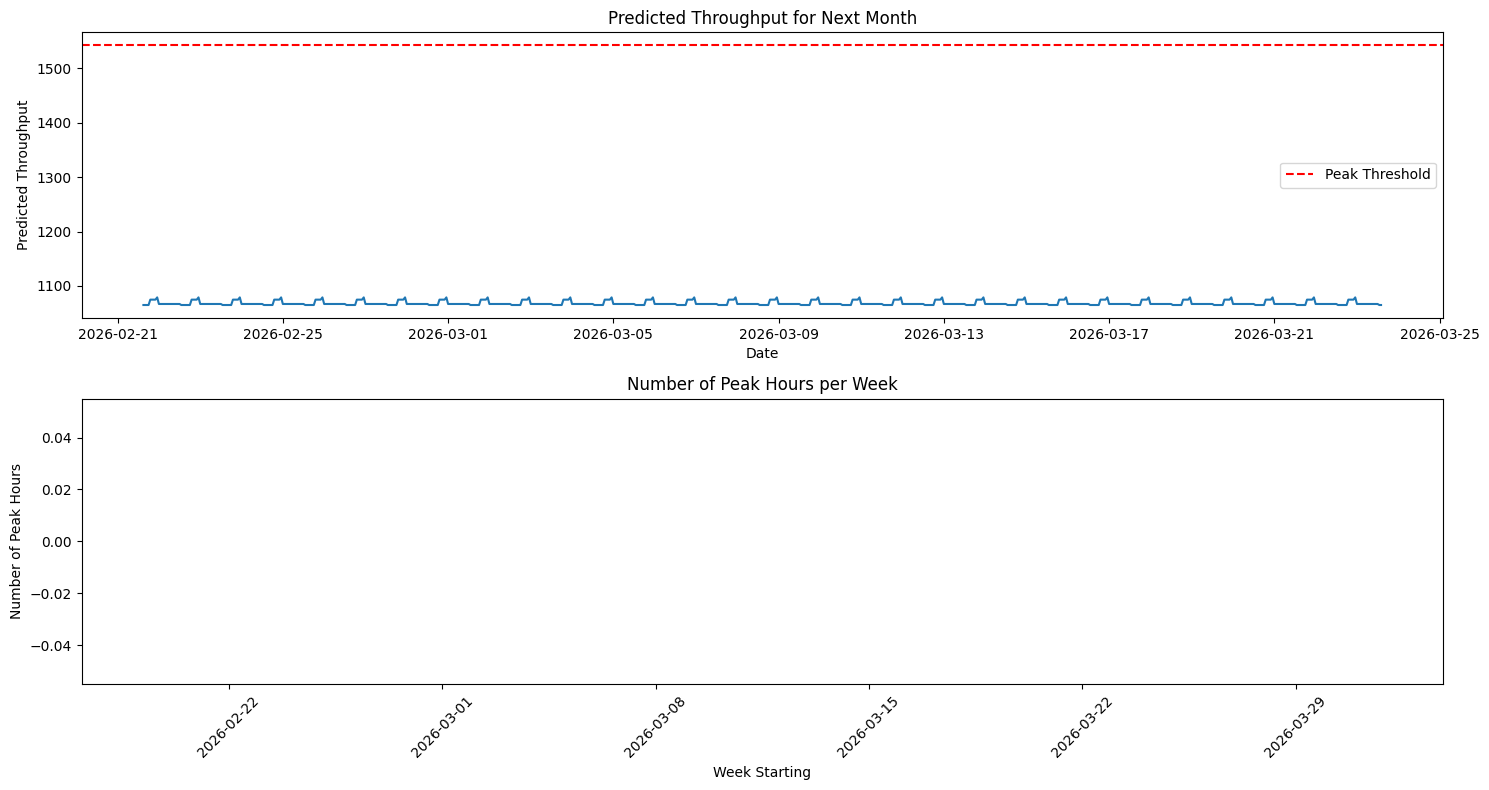


Weekly Peak Traffic Prediction Summary:
-------------------------------------

Week starting 2026-02-22:
Average Throughput: 1069.04 requests/hour
Peak Throughput: 1079.05 requests/hour
Number of Peak Hours: 0

Top 3 Peak Times:
  2026-02-21 23:00 - 1079.05 requests/hour
  2026-02-22 23:00 - 1079.05 requests/hour
  2026-02-21 19:00 - 1074.91 requests/hour

Week starting 2026-03-01:
Average Throughput: 1068.30 requests/hour
Peak Throughput: 1079.05 requests/hour
Number of Peak Hours: 0

Top 3 Peak Times:
  2026-02-23 23:00 - 1079.05 requests/hour
  2026-02-24 23:00 - 1079.05 requests/hour
  2026-02-25 23:00 - 1079.05 requests/hour

Week starting 2026-03-08:
Average Throughput: 1068.30 requests/hour
Peak Throughput: 1079.05 requests/hour
Number of Peak Hours: 0

Top 3 Peak Times:
  2026-03-02 23:00 - 1079.05 requests/hour
  2026-03-03 23:00 - 1079.05 requests/hour
  2026-03-04 23:00 - 1079.05 requests/hour

Week starting 2026-03-15:
Average Throughput: 1068.30 requests/hour
Peak Through

In [2]:
# Generate future dates for one month
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=30*24, freq='H')  # 30 days of hourly data
future_df = pd.DataFrame(index=future_dates)

# Create features for future dates
future_df['date'] = future_df.index
future_df['hour'] = future_df.index.hour.astype(float)
future_df['dayofweek'] = future_df.index.dayofweek.astype(float)
future_df['quarter'] = future_df.index.quarter.astype(float)
future_df['month'] = future_df.index.month.astype(float)
future_df['year'] = future_df.index.year.astype(float)
future_df['dayofyear'] = future_df.index.dayofyear.astype(float)
future_df['dayofmonth'] = future_df.index.day.astype(float)
future_df['weekofyear'] = future_df.index.isocalendar().week.astype(float)

# Add holiday feature
future_df['is_holiday'] = 0

# Use last known values for system metrics
future_df['cpu_usage'] = df['cpu_usage'].mean()
future_df['memory_usage'] = df['memory_usage'].mean()
future_df['throughput_24h_avg'] = df['throughput'].mean()
future_df['throughput_24h_std'] = df['throughput'].std()
future_df['throughput_24h_max'] = df['throughput'].max()
future_df['cpu_usage_avg'] = df['cpu_usage'].mean()
future_df['memory_usage_avg'] = df['memory_usage'].mean()

# Make predictions for future dates
future_predictions = model.predict(future_df[X_train.columns])

# Identify peak hours
future_peaks = future_predictions > peak_threshold

# Group by week and calculate peak hours
weekly_peaks = pd.DataFrame({
    'date': future_dates,
    'prediction': future_predictions,
    'is_peak': future_peaks
}).set_index('date')

# Calculate weekly statistics
weekly_stats = []
for name, group in weekly_peaks.resample('W'):
    stats = {
        'week_start': name.strftime('%Y-%m-%d'),
        'avg_throughput': group['prediction'].mean(),
        'max_throughput': group['prediction'].max(),
        'peak_hours': group['is_peak'].sum(),
        'top_peaks': group.nlargest(3, 'prediction')
    }
    weekly_stats.append(stats)

# Plot weekly predictions
plt.figure(figsize=(15, 8))

# Plot 1: Throughput Prediction
plt.subplot(2, 1, 1)
plt.plot(weekly_peaks.index, weekly_peaks['prediction'])
plt.axhline(y=peak_threshold, color='red', linestyle='--', label='Peak Threshold')
plt.title('Predicted Throughput for Next Month')
plt.xlabel('Date')
plt.ylabel('Predicted Throughput')
plt.legend()

# Plot 2: Peak Hours per Week
plt.subplot(2, 1, 2)
weekly_peak_hours = [stats['peak_hours'] for stats in weekly_stats]
week_labels = [stats['week_start'] for stats in weekly_stats]
plt.bar(week_labels, weekly_peak_hours)
plt.title('Number of Peak Hours per Week')
plt.xlabel('Week Starting')
plt.ylabel('Number of Peak Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print weekly summary
print("\nWeekly Peak Traffic Prediction Summary:")
print("-------------------------------------")
for stats in weekly_stats:
    print(f"\nWeek starting {stats['week_start']}:")
    print(f"Average Throughput: {stats['avg_throughput']:.2f} requests/hour")
    print(f"Peak Throughput: {stats['max_throughput']:.2f} requests/hour")
    print(f"Number of Peak Hours: {int(stats['peak_hours'])}")
    
    print("\nTop 3 Peak Times:")
    for idx, peak in stats['top_peaks'].iterrows():
        print(f"  {idx.strftime('%Y-%m-%d %H:00')} - {peak['prediction']:.2f} requests/hour")